#### Problem Statement:
Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate 
market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market 
and there are various companies working in the domain. Data science comes as a very important tool to solve problems 
in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and 
focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, 
recommendation systems are some of the machine learning techniques used for achieving the business goals for housing 
companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses 
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same 
purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file 
below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model 
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest 
in them or not. For this company wants to know:
- Which variables are important to predict the price of variable?
- How do these variables describe the price of the house?
#### Business Goal:
You are required to model the price of houses with the available independent variables. This model will then be used 
by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the 
strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the 
management to understand the pricing dynamics of a new market.
Technical Requirements:
- Data contains 1460 entries each having 81 variables.
- Data contains Null values. You need to treat them using the domain knowledge and your own understanding.
- Extensive EDA has to be performed to gain relationships of important variable and price.
- Data contains numerical as well as categorical variable. You need to handle them accordingly.
- You have to build Machine Learning models, apply regularization and determine the optimal values of Hyper 
Parameters. 
- You need to find important features which affect the price positively or negatively.
- Two datasets are being provided to you (test.csv, train.csv). You will train on train.csv dataset and predict on 
    test.csv file.

In [137]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [138]:
train_df = pd.read_csv('train.csv')
train_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

In [139]:
test_df = pd.read_csv('test.csv')
test_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3         Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      7    2007        WD         Normal  
1       0      8    2009       COD        Abnorml  
2       0      6    2009        WD         Normal  
3       0      7    2009        WD         Normal  
4       0      1    2008        WD         Normal  

[5 rows x 80 columns]

##### SalePrice is the output variable which is continuous and it will be a regression model

#### Statistical Information of Dataset

In [140]:
train_df.shape

(1168, 81)

- we have 1168 rows and 81 columns in train data

In [141]:
test_df.shape

(292, 80)

- we have 292 rows and 80 columns in test data

In [142]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

- we have combination of both numerical and categeorical type data

In [143]:
train_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1168.000000  1168.000000    954.00000    1168.000000  1168.000000   
mean    724.136130    56.767979     70.98847   10484.749144     6.104452   
std     416.159877    41.940650     24.82875    8957.442311     1.390153   
min       1.000000    20.000000     21.00000    1300.000000     1.000000   
25%     360.500000    20.000000     60.00000    7621.500000     5.000000   
50%     714.500000    50.000000     70.00000    9522.500000     6.000000   
75%    1079.500000    70.000000     80.00000   11515.500000     7.000000   
max    1460.000000   190.000000    313.00000  164660.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1168.000000  1168.000000   1168.000000  1161.000000  1168.000000  ...   
mean      5.595890  1970.930651   1984.758562   102.310078   444.726027  ...   
std       1.124343    30.145255     20.785185   182.595606   462.664785  ...   
min       1.000000  1875.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1966.000000     0.000000     0.000000  ...   
50%       5.000000  1972.000000   1993.000000     0.000000   385.500000  ...   
75%       6.000000  2000.000000   2004.000000   160.000000   714.500000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     96.206336    46.559932      23.015411     3.639555    15.051370   
std     126.158988    66.381023      63.191089    29.088867    55.080816   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    24.000000       0.000000     0.000000     0.000000   
75%     171.000000    70.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1168.000000   1168.000000  1168.000000  1168.000000    1168.000000  
mean      3.448630     47.315068     6.344178  2007.804795  181477.005993  
std      44.896939    543.264432     2.686352     1.329738   79105.586863  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  130375.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163995.000000  
75%       0.000000      0.000000     8.000000  2009.000000  215000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

- There is lot of difference b/w mean and std 
- There is also lot of difference b/w 75% and max 
- we can expect both outliers and skewness

In [144]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

- Id : Unique id of the housing prediction dataset
- MSSubClass : The Building class
- MSZoning : zone of the house(RL, RM, FV, RH, C(all))
- LotFrontage : Linear feet of street connected to property
- LotArea : Lot size in square feet
- Street : This talks about the type of road(Pave/gravel)
- Alley : Type of alley access (pave,grvl) note: we have nan values in this feature
- LotShape : general shape of the property('IR1', 'Reg', 'IR2', 'IR3')
- LandContour : Flatness of the property ['Lvl', 'Bnk', 'HLS', 'Low']
- Utilities : Type of utilities available['AllPub'], as we have only one variable we can drop
- LotConfig : Lot configuration ['Inside', 'CulDSac', 'FR2', 'Corner', 'FR3']
- LandSlope : Slope of property ['Gtl', 'Mod', 'Sev']
- Neighborhood : Physical locations within ames city limits ['NPkVill', 'NAmes', 'NoRidge', 'NWAmes', 'Gilbert', 'Sawyer','Edwards', 'IDOTRR', 'CollgCr', 'Mitchel', 'Crawfor', 'BrDale','StoneBr', 'BrkSide', 'NridgHt', 'OldTown', 'Somerst', 'Timber','SWISU', 'SawyerW', 'ClearCr', 'Veenker', 'Blmngtn', 'MeadowV','Blueste']
- Condition1 : Proximity to main road or rail road ['Norm', 'Feedr', 'RRAn', 'PosA', 'RRAe', 'Artery', 'PosN', 'RRNe',
       'RRNn']
- Condition2 : Proximity to main road or rail road if a second is present ['Norm', 'RRAe', 'Feedr', 'PosN', 'Artery', 'RRNn', 'PosA', 'RRAn']
- BldgType : Type of dwelling ['TwnhsE', '1Fam', 'Duplex', 'Twnhs', '2fmCon']
- HouseStyle : style of dwelling ['1Story', '2Story', '1.5Fin', 'SFoyer', '1.5Unf', 'SLvl', '2.5Fin','2.5Unf']
- OverallQual : Overall quality [ 6,  8,  7,  5,  9,  1,  2,  4,  3, 10]
- OverallCond : Overall Condition [5, 6, 7, 4, 8, 2, 3, 9, 1]
- YearBuilt : Construction Date (min : 1875, max :2010)
- YearRemodAdd : remodel date (max:2010,min 1950)
- RoofStyle : Style of the roof ['Gable', 'Flat', 'Hip', 'Shed', 'Gambrel', 'Mansard']
- RoofMatl  : roof material ['CompShg', 'Tar&Grv', 'WdShngl', 'WdShake', 'Roll', 'ClyTile','Metal', 'Membran']
- Exterior1st : Exterior covering of house ['Plywood', 'Wd Sdng', 'MetalSd', 'CemntBd', 'VinylSd', 'HdBoard',
       'Stucco', 'WdShing', 'BrkFace', 'Stone', 'AsbShng', 'AsphShn',
       'ImStucc', 'BrkComm']
- Exterior2nd : Exterior covering of house if more than one material ['Plywood', 'Wd Sdng', 'MetalSd', 'CmentBd', 'VinylSd', 'HdBoard','Wd Shng', 'Stucco', 'ImStucc', 'Stone', 'BrkFace', 'AsbShng','Brk Cmn', 'AsphShn', 'Other']
- MasVnrType : Masonry veneer type  ['None', 'BrkFace', 'Stone', 'BrkCmn', nan] we have nan and None type values here
- MasVnrArea : Masonry veneer area in square feet 
- ExterQual : Exterior material quality ['TA', 'Gd', 'Ex', 'Fa']
- ExterCond : present condition of the material on the exterior ['TA', 'Gd', 'Fa', 'Po', 'Ex']
- Foundation : Type of foundation ['CBlock', 'PConc', 'BrkTil', 'Slab', 'Stone', 'Wood']
- BsmtQual : Height of the basement ['Gd', 'TA', 'Ex', nan, 'Fa'] we have NaN values
- BsmtCond : General condition of the basement ['TA', 'Gd', 'Fa', nan, 'Po'] we have NaN values
- BsmtExposure : walk out or garden level basement walls ['No', 'Gd', 'Av', 'Mn', nan] we have Nan values
- BsmtFinType1 : quality of basement finished area ['ALQ', 'GLQ', 'BLQ', 'Unf', 'Rec', 'LwQ', nan]
- BsmtFinSF1 : type 1 finished square feet.
- BsmtFinType2 : quality of seconf finished area if present ['Unf', 'Rec', 'BLQ', 'GLQ', nan, 'ALQ', 'LwQ'] we have nan values
- BsmtFinSF2 : Type 2 finished square feet
- BsmtUnfSF : Unfinished squarefeet of basement area
- TotalBsmtSF : Total sqaure feet of basement area
- Heating : type of heating ['GasA', 'GasW', 'Floor', 'OthW', 'Wall', 'Grav']
- HeatingQC : Heating quality and condition ['TA', 'Ex', 'Gd', 'Fa', 'Po']
- CentralAir : Central Air condition 
- Electrical : electrical system ['SBrkr', 'FuseA', 'FuseF', 'FuseP', 'Mix']
- 1stFlrSF : first floor square feet 
- 2ndFlrSF : second floor square feet
- LowQualFinSF : low quality finished square feet all floors
- GrLivArea : above grade living area square feet
- BsmtFullBath : basement full bathrooms
- BsmtHalfBath : basement half bathrooms
- FullBath : full bath rooms above grade
- HalfBath : Half baths above grade
- BedroomAbvGr : no of bedrroms above basement level
- KitchenAbvGr : no of kitchens
- KitchenQual : Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

#### Getting unique values of categeorical features

In [145]:
#Gettign all object related data
traindf_features_list = []
for feature_type in train_df.dtypes.index:
    if train_df.dtypes[feature_type]=='object':
        traindf_features_list.append(feature_type)
traindf_features_list

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [146]:
# Lets find the unique values which are present in train_df categeorical columns
for feature in traindf_features_list:
    print(f'The unique variables in {feature} with value counts are')
    print(train_df[feature].value_counts())
    print(f'The Total sum of value counts {feature} are' ,train_df[feature].value_counts().sum())
    print(f'The Unique values in {feature} are ',train_df[feature].unique())
    print('--------------------------------------')

The unique variables in MSZoning with value counts are
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64
The Total sum of value counts MSZoning are 1168
The Unique values in MSZoning are  ['RL' 'RM' 'FV' 'RH' 'C (all)']
--------------------------------------
The unique variables in Street with value counts are
Pave    1164
Grvl       4
Name: Street, dtype: int64
The Total sum of value counts Street are 1168
The Unique values in Street are  ['Pave' 'Grvl']
--------------------------------------
The unique variables in Alley with value counts are
Grvl    41
Pave    36
Name: Alley, dtype: int64
The Total sum of value counts Alley are 77
The Unique values in Alley are  [nan 'Grvl' 'Pave']
--------------------------------------
The unique variables in LotShape with value counts are
Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64
The Total sum of value counts LotShape are 1168
The Unique values in LotShape are  ['

In [147]:
#Gettign all numerical  related data
traindf_num_features_list = []
for feature_type in train_df.dtypes.index:
    if train_df.dtypes[feature_type]=='int64' or train_df.dtypes[feature_type]=='float64':
        traindf_num_features_list.append(feature_type)
traindf_num_features_list

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [148]:
# Lets find the unique values which are present in train_df categeorical columns
for feature in traindf_num_features_list:  
    print(f'The unique variables in {feature} with value counts are')
    print(train_df[feature].value_counts())
    print(f'The Total sum of value counts {feature} are' ,train_df[feature].value_counts().sum())
    print(f'The Unique values in {feature} are ',train_df[feature].unique())
    print('--------------------------------------')

The unique variables in Id with value counts are
127     1
1391    1
1389    1
448     1
1179    1
821     1
178     1
1076    1
60      1
733     1
739     1
1192    1
263     1
582     1
392     1
327     1
89      1
317     1
1287    1
841     1
218     1
436     1
1108    1
548     1
619     1
489     1
282     1
925     1
812     1
1345    1
104     1
1182    1
284     1
990     1
923     1
784     1
627     1
889     1
1283    1
876     1
1034    1
68      1
322     1
445     1
674     1
928     1
966     1
675     1
892     1
106     1
1233    1
453     1
1196    1
1355    1
916     1
1195    1
891     1
1128    1
403     1
459     1
225     1
274     1
364     1
813     1
478     1
1281    1
1054    1
319     1
1015    1
1265    1
366     1
307     1
82      1
720     1
292     1
1205    1
993     1
1367    1
75      1
1446    1
663     1
1103    1
463     1
1173    1
1270    1
1294    1
376     1
460     1
161     1
1300    1
57      1
1401    1
350     1
175     1
1051    1
2

In [149]:
# Dropping ID feature as it is not having much efefct on target variable
train_df.drop('Id',axis=1,inplace=True)

In [150]:
# Dropping the same feature in test_df also
test_df.drop('Id',axis=1,inplace=True)

#### Finding NaN values in the dataset

In [151]:
pd.set_option('display.max_rows', None)
train_df.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

<AxesSubplot:>

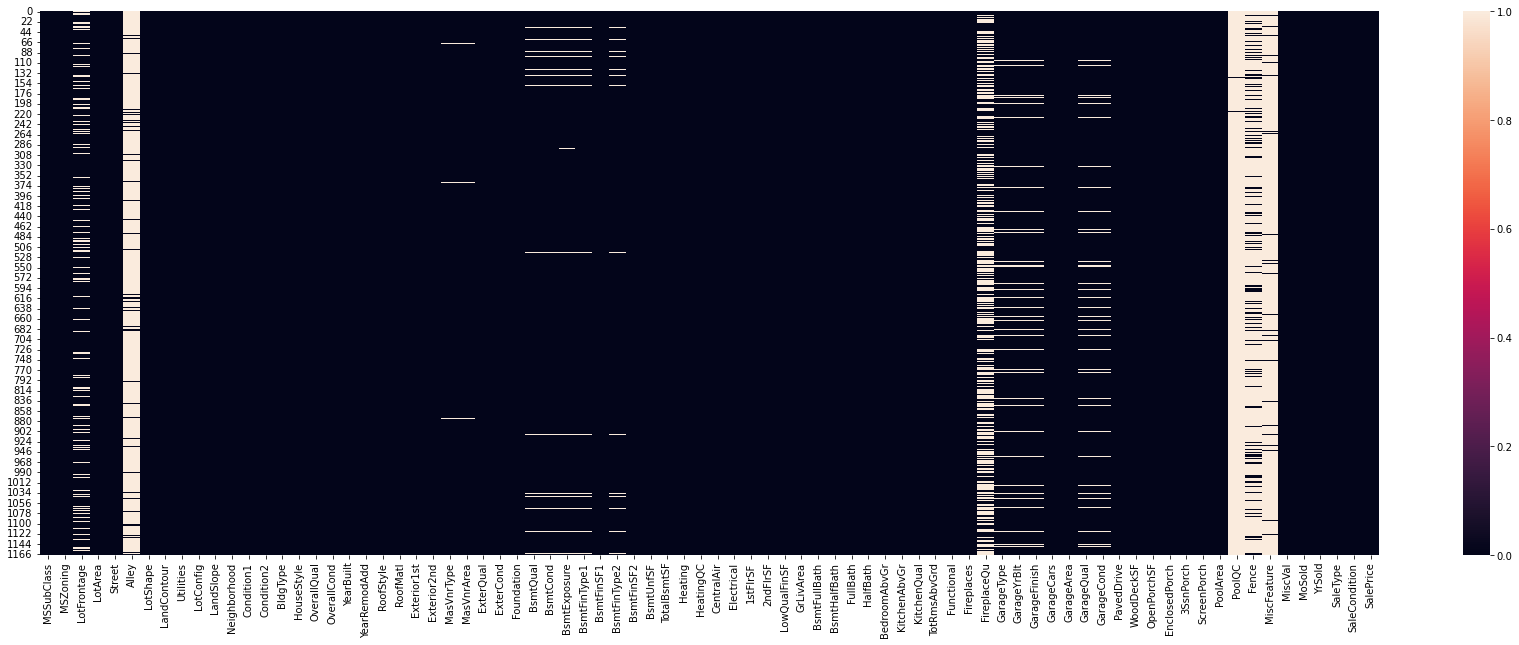

In [152]:
plt.figure(figsize=(30,10))
sns.heatmap(train_df.isnull())

- we have Null values in 
    * LotFrontage
    * Alley
    * MasVnrType
    * MasVnrArea
    * BsmtQual
    * BsmtCond
    * BsmtExposure
    * BsmtFinType1
    * BsmtFinType2
    * FireplaceQu
    * GarageType
    * GarageYrBlt
    * GarageFinish
    * GarageQual
    * GarageCond
    * PoolQC
    * Fence
    * MiscFeature

###### Alley Feature

In [153]:
train_df['Alley'].value_counts()

Grvl    41
Pave    36
Name: Alley, dtype: int64

In [154]:
print((train_df['Alley'].isnull().sum()/1168)*100) # 93% of null values are present in data set

93.40753424657534


###### FireplaceQu Feature

In [155]:
train_df['FireplaceQu'].value_counts()

Gd    301
TA    252
Fa     25
Ex     21
Po     18
Name: FireplaceQu, dtype: int64

In [156]:
print((train_df['FireplaceQu'].isnull().sum()/1168)*100) # 47% of null values are present in data set

47.17465753424658


###### PoolQC Feature

In [157]:
train_df['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [158]:
print((train_df['PoolQC'].isnull().sum()/1168)*100) # 99% of null values are present in data set

99.40068493150685


###### Fence Feature

In [159]:
train_df['Fence'].value_counts()

MnPrv    129
GdPrv     51
GdWo      47
MnWw      10
Name: Fence, dtype: int64

In [160]:
print((train_df['Fence'].isnull().sum()/1168)*100) # 79% of null values are present in data set

79.70890410958904


###### MiscFeature Feature

In [161]:
train_df['MiscFeature'].value_counts()

Shed    40
Gar2     2
TenC     1
Othr     1
Name: MiscFeature, dtype: int64

In [162]:
print((train_df['MiscFeature'].isnull().sum()/1168)*100) # 96% of null values are present in data set

96.23287671232876


In [163]:
train_df['MasVnrType'].value_counts()

None       696
BrkFace    354
Stone       98
BrkCmn      13
Name: MasVnrType, dtype: int64

##### Replacing all None values to numpy.NaN values

In [164]:
train_df['MasVnrType']=train_df['MasVnrType'].replace('None', np.NaN)

In [165]:
train_df['MasVnrType'].value_counts()

BrkFace    354
Stone       98
BrkCmn      13
Name: MasVnrType, dtype: int64

In [166]:
train_df['MasVnrType'].value_counts().sum()

465

In [167]:
train_df['MasVnrType'].isnull().sum()

703

######  Dropping all features which have heavy amount of NaN values in the dataset features as they dont contribute much in targeet variable

In [168]:
train_df.drop(columns=['Alley','PoolQC','Fence','MiscFeature','FireplaceQu','MasVnrType'],axis=1,inplace=True)

In [169]:
# Test Data also have same amount of Nan value percentages so dropping them
test_df.drop(columns=['Alley','PoolQC','Fence','MiscFeature','FireplaceQu','MasVnrType'],axis=1,inplace=True)

In [170]:
nan_feature = [feature for feature in train_df.columns if train_df[feature].isnull().sum() >=1 and train_df[feature].dtypes=='object']

In [171]:
nan_feature

['BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [172]:
nan_num_features = [feature for feature in train_df.columns if train_df[feature].isnull().sum() >=1 and train_df[feature].dtypes=='float64']
nan_num_features

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [173]:
train_df['LotFrontage'].value_counts()

60.0     111
80.0      60
70.0      58
75.0      46
50.0      44
65.0      35
85.0      26
90.0      20
78.0      19
73.0      16
24.0      16
68.0      16
79.0      14
21.0      14
64.0      14
51.0      13
72.0      13
55.0      13
100.0     12
59.0      12
82.0      12
63.0      11
71.0      11
74.0      11
53.0      10
69.0      10
66.0      10
88.0      10
84.0       9
34.0       9
67.0       9
77.0       8
40.0       8
52.0       8
43.0       8
76.0       8
92.0       8
57.0       7
86.0       7
35.0       7
95.0       7
62.0       7
61.0       7
94.0       6
54.0       6
44.0       6
96.0       6
81.0       6
120.0      6
98.0       6
41.0       6
107.0      5
87.0       5
30.0       5
36.0       5
105.0      5
89.0       5
58.0       5
93.0       5
91.0       4
49.0       4
83.0       3
103.0      3
110.0      3
130.0      3
48.0       3
99.0       3
104.0      3
108.0      3
56.0       3
47.0       3
32.0       3
37.0       3
116.0      2
121.0      2
109.0      2
313.0      2

In [174]:
train_df['LotFrontage'].value_counts().sum()

954

In [175]:
train_df['LotFrontage'].unique()

array([ nan,  95.,  92., 105.,  58.,  88.,  70.,  80.,  50.,  44., 129.,
        59.,  55.,  64.,  24.,  68.,  71.,  74.,  61.,  60., 120.,  84.,
       141.,  30.,  65.,  76., 100.,  85.,  75., 107., 122.,  82.,  62.,
        73.,  79.,  77.,  41.,  69.,  90.,  96.,  72.,  34.,  78.,  63.,
        40.,  98., 160., 108., 128.,  51.,  81.,  99.,  66.,  37., 174.,
        87.,  53., 152.,  47.,  86.,  56.,  89.,  35.,  52.,  21., 104.,
        57.,  83.,  46., 101., 112., 149.,  93.,  49.,  43., 130.,  54.,
        91.,  67.,  97., 110., 103., 115.,  94.,  48.,  36., 313., 109.,
       144., 121., 102., 116., 182.,  32.,  42., 168., 118.,  38., 140.,
       134., 114., 124.,  39., 111.,  45., 106., 153.])

- There are unique values in 'LotFrontage' feature which are continuous

In [176]:
train_df['MasVnrArea'].value_counts()

0.0       692
72.0        7
180.0       6
120.0       6
106.0       5
84.0        5
108.0       5
80.0        5
336.0       4
320.0       4
100.0       4
246.0       4
160.0       4
340.0       4
178.0       4
360.0       4
288.0       4
168.0       4
300.0       4
216.0       4
40.0        4
210.0       4
132.0       4
16.0        4
220.0       4
104.0       3
170.0       3
128.0       3
174.0       3
200.0       3
82.0        3
99.0        3
252.0       3
70.0        3
256.0       3
208.0       3
186.0       3
130.0       3
110.0       3
350.0       3
85.0        3
183.0       3
456.0       3
158.0       2
312.0       2
306.0       2
117.0       2
44.0        2
344.0       2
272.0       2
145.0       2
305.0       2
205.0       2
18.0        2
125.0       2
260.0       2
143.0       2
285.0       2
144.0       2
135.0       2
74.0        2
362.0       2
335.0       2
116.0       2
30.0        2
420.0       2
243.0       2
76.0        2
660.0       2
182.0       2
203.0       2
238.0 

In [177]:
train_df['MasVnrArea'].value_counts().sum()

1161

In [178]:
train_df['MasVnrArea'].unique()

array([0.000e+00, 4.800e+02, 1.260e+02, 1.800e+02, 6.700e+01, 2.230e+02,
       6.600e+01, 8.200e+01, 1.740e+02, 3.040e+02, 1.720e+02, 1.660e+02,
       1.840e+02, 3.500e+02, 4.120e+02, 1.000e+00, 1.890e+02, 1.120e+02,
       5.000e+01, 2.200e+02, 1.600e+01, 6.300e+02, 2.810e+02, 2.870e+02,
       3.400e+02, 2.160e+02,       nan, 1.400e+02, 1.830e+02, 3.360e+02,
       3.960e+02, 2.320e+02, 3.200e+02, 8.500e+01, 1.620e+02, 1.540e+02,
       1.760e+02, 1.200e+02, 1.080e+02, 2.520e+02, 1.300e+02, 3.510e+02,
       5.710e+02, 5.300e+01, 2.040e+02, 9.750e+02, 6.530e+02, 8.000e+01,
       4.720e+02, 3.400e+01, 1.650e+02, 2.370e+02, 1.130e+02, 9.000e+01,
       1.600e+02, 1.470e+02, 1.360e+02, 3.760e+02, 8.900e+01, 4.150e+02,
       2.000e+02, 5.060e+02, 2.860e+02, 4.500e+01, 2.450e+02, 2.470e+02,
       2.400e+02, 7.000e+01, 9.800e+01, 6.040e+02, 8.600e+02, 2.700e+01,
       1.530e+02, 2.120e+02, 2.060e+02, 7.600e+02, 2.960e+02, 5.280e+02,
       2.990e+02, 3.380e+02, 1.230e+02, 2.330e+02, 

In [179]:
train_df['GarageYrBlt'].unique()

array([1977., 1970., 1997., 2006., 1957., 1965., 1947., 1937., 2003.,
       1974., 1955., 1923., 2002., 2007., 1987., 2001., 1988., 1950.,
       1961., 1953., 2010., 1922., 1939., 2005., 1991., 1979., 1975.,
       1976., 1978., 1960., 1956., 2004., 1982., 2000., 1948.,   nan,
       1964., 1920., 1930., 1968., 1946., 1992., 1936., 1967., 1989.,
       1959., 1966., 1916., 1941., 1998., 1962., 1926., 1925., 1983.,
       1999., 1969., 1985., 1993., 2008., 1971., 1980., 1945., 1995.,
       1981., 1994., 1949., 1996., 1921., 1963., 1938., 1958., 1935.,
       1940., 1990., 1910., 1954., 1927., 2009., 1986., 1929., 1984.,
       1973., 1924., 1942., 1900., 1931., 1951., 1934., 1972., 1932.,
       1928., 1918., 1908., 1933., 1906., 1914., 1952., 1915.])

#### LotFrontage has many missing values so using KNN IMputer to handle NaN values

In [180]:
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors=2)
train_df[['LotFrontage']] = knn.fit_transform(train_df[['LotFrontage']])
test_df[['LotFrontage']] = knn.fit_transform(test_df[['LotFrontage']])

#### Handling NaN values for All object type and 2 other float type by using Simple Imputer

In [181]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values=np.nan, strategy='most_frequent', verbose=0)
# Handling train data
si = si.fit(train_df[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','GarageCond','MasVnrArea','GarageYrBlt']])
train_df[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','GarageCond','MasVnrArea','GarageYrBlt']] = si.transform(train_df[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','GarageCond','MasVnrArea','GarageYrBlt']])
# Handling test data
si = si.fit(test_df[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','GarageCond','MasVnrArea','GarageYrBlt']])
test_df[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','GarageCond','MasVnrArea','GarageYrBlt']] = si.transform(test_df[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','GarageCond','MasVnrArea','GarageYrBlt']])



In [182]:
train_df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional  

<AxesSubplot:>

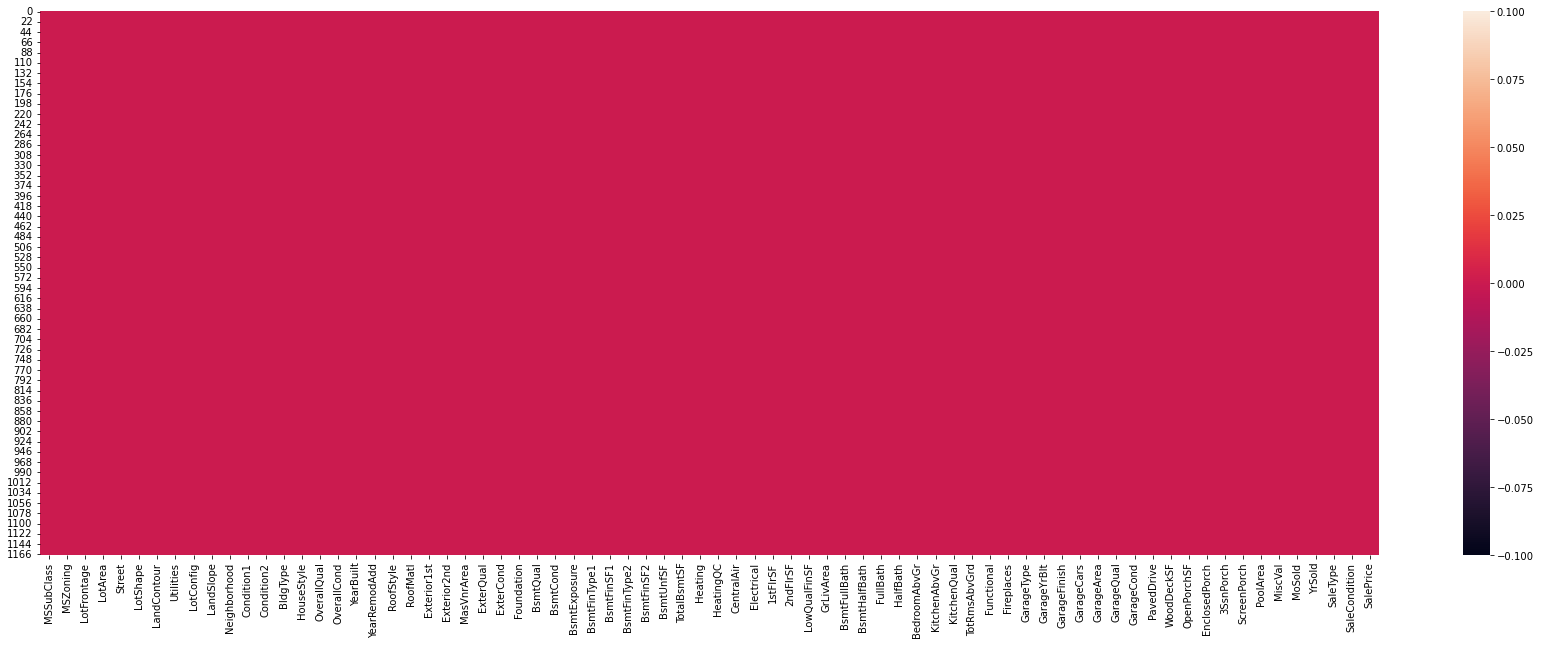

In [183]:
# Checking NaN values again using plot
plt.figure(figsize=(30,10))
sns.heatmap(train_df.isnull())

- Now no NaN values are present in the dataset

In [184]:
test_df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       1
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional  

##### All NaN values in both train data and test data are handled

### Univariate Analaysis for all object related features

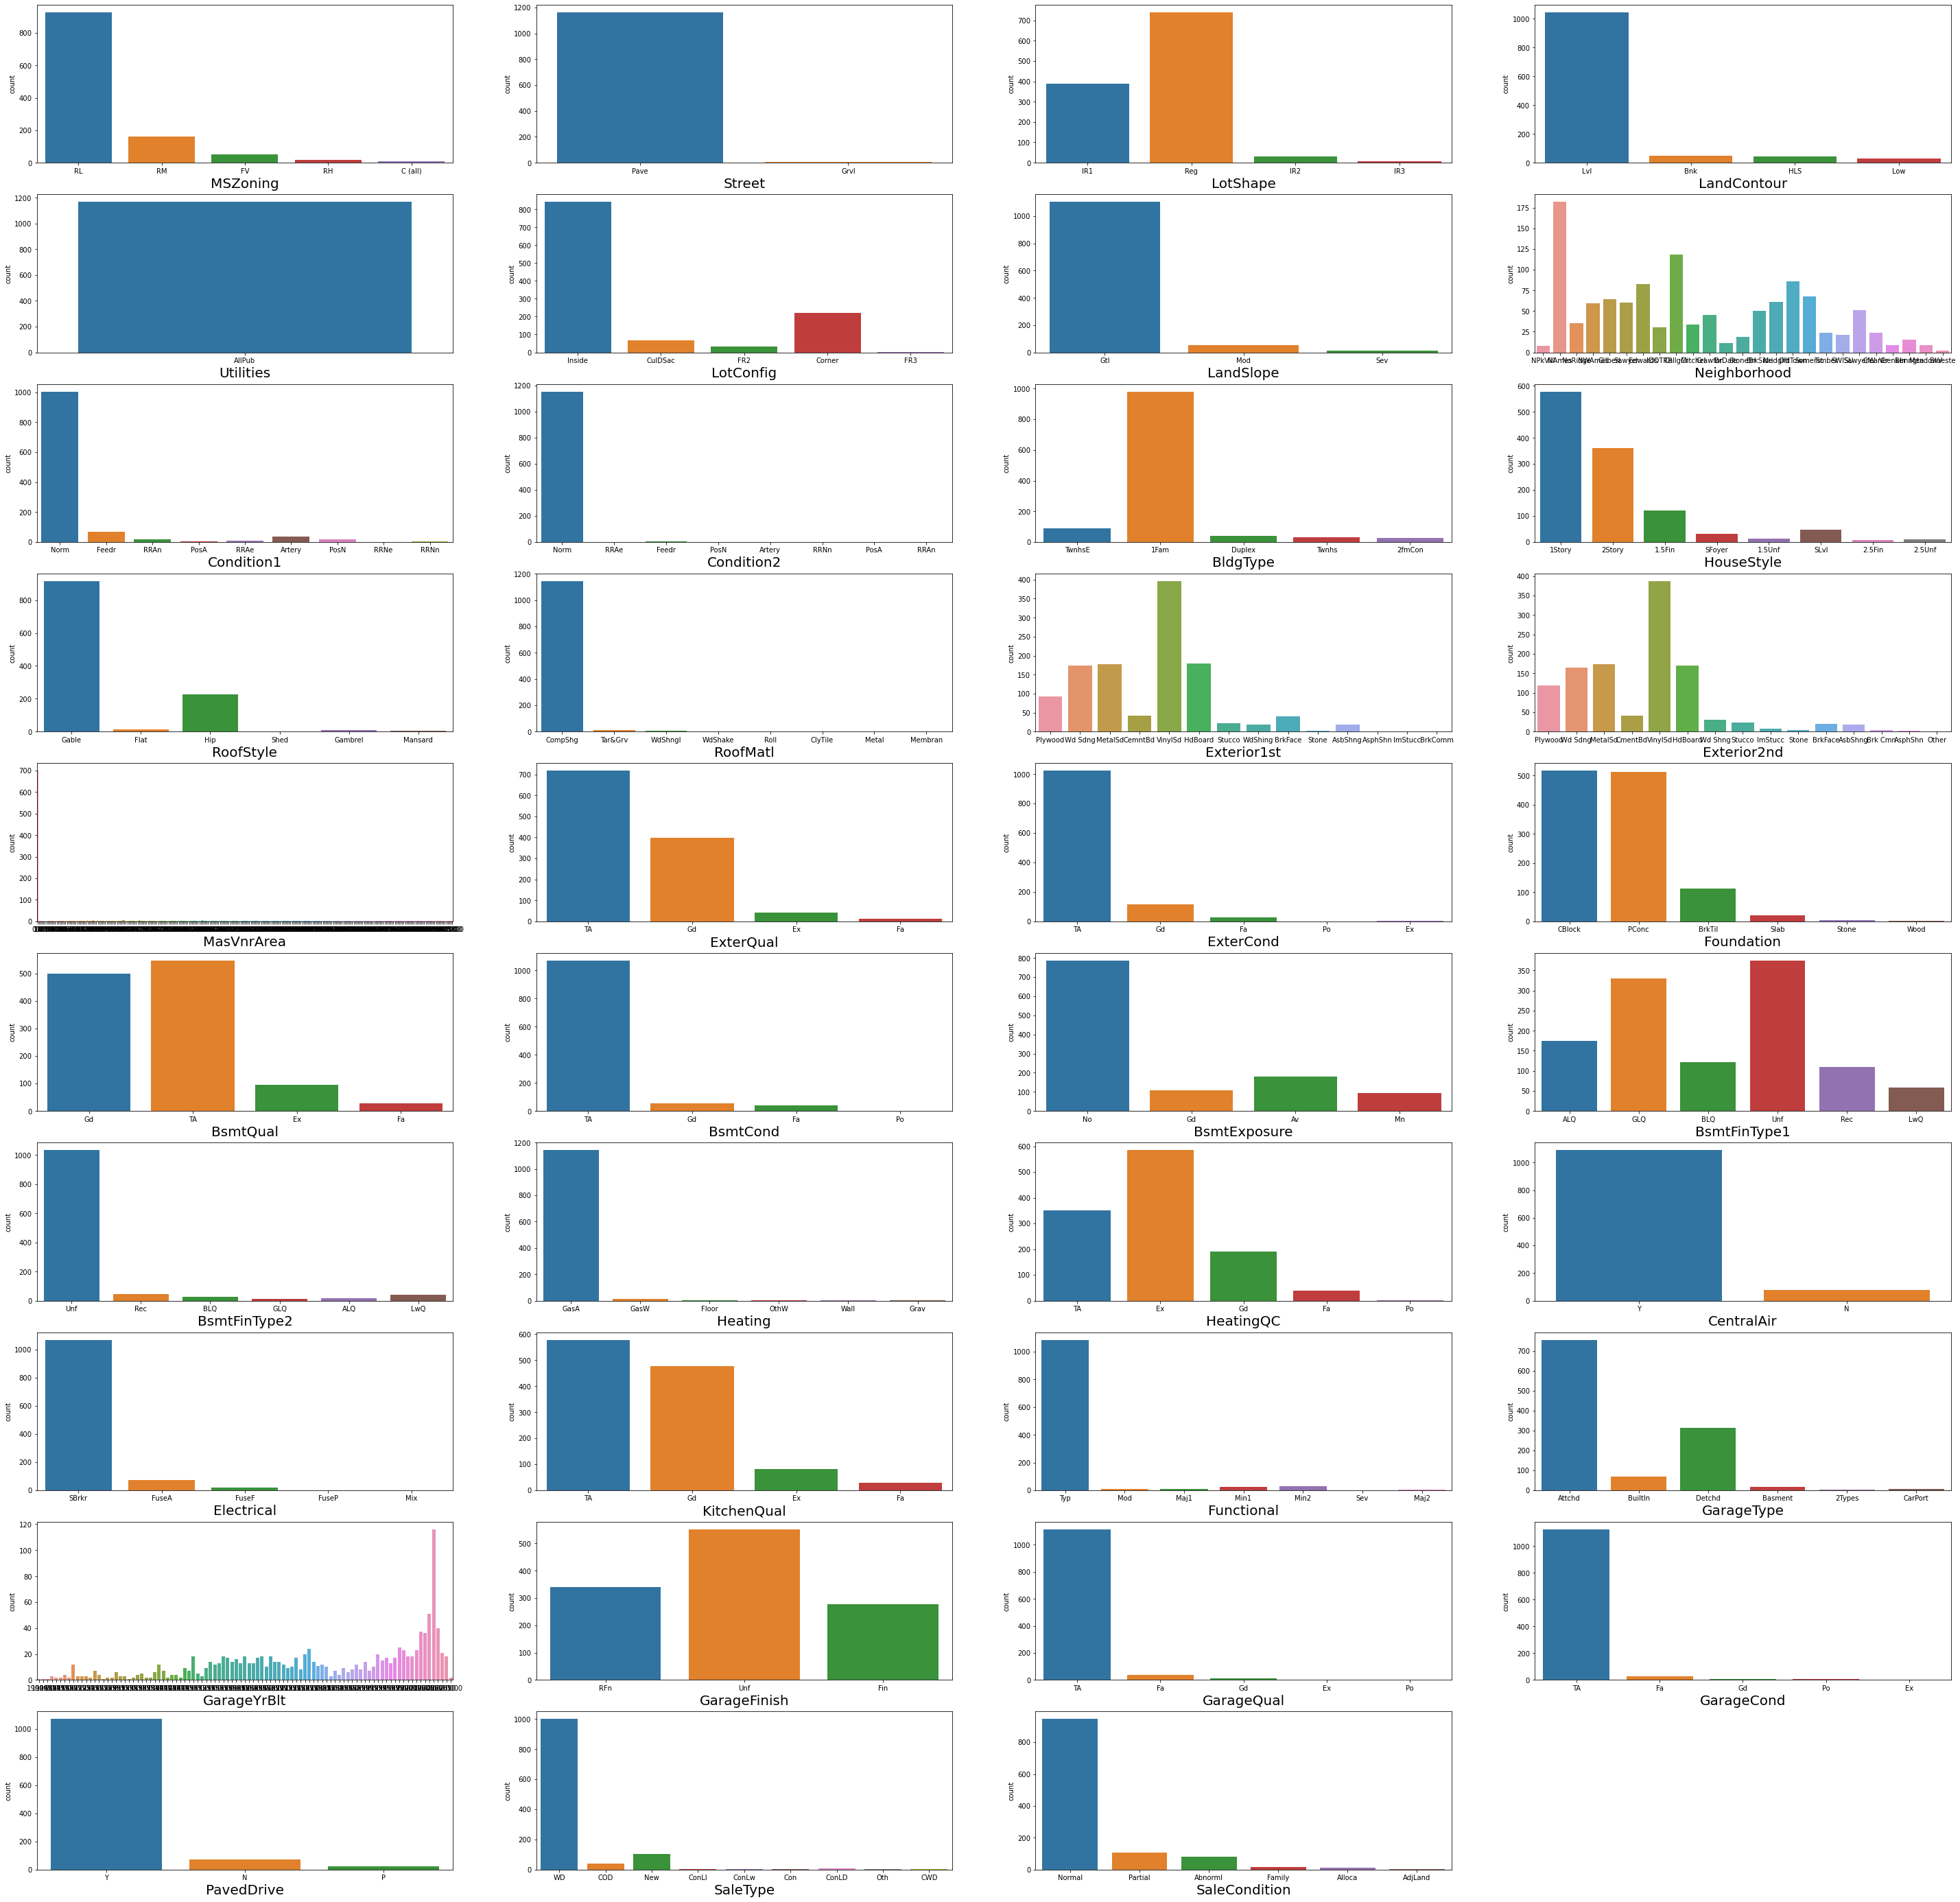

In [185]:
plt.figure(figsize=(50,50),facecolor ='white')
plotnum = 1
for col in train_df[train_df.columns[train_df.dtypes == 'object']]:
    if plotnum<=40:
        plt.subplot(10,4,plotnum)
        sns.countplot(train_df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

- MSZoning has the more data related to RL
- Most common street type isi pave
- Most of the Lotshapes has the regular structures
- Most of the properties has lv1
- utilities has only one value(ALLPUB)
- Most common LotConfig is Inside type
- slope of property land is mostly gentle
- Most of the properties are situated in neighborhoods of Neighborhoods of North AMerica,followed by college creek
Edwards  and old town
- Most of the housing properties with feature condition1 and condition2 are in normal conditions
- Mostly all the propertie sare 1 storey and 2 storey
- Most of the properties with feature BldgtYPE HAS IFam type
- Most of properties have the Gable type roofstyle
- Most of the properties used roofMatl has Compshg
- most of the properties has Exteriors has vinylsd type
- most of properties dont have masonry veneer type while some has brick face
- Most of the properties has the typical/average exteriors
- Most of the properties has the typical/average exterior conditions
- most of the properties has foundation type as cblock.pconc
- The height of the basement is usually either typical (80-89 inches) or good (90-99 inches)
- The general condition of the basement is commonly Typical with slight dampness
- Basements most commonly have no exposure
- Most of the houses basements are unfinished followed by houses with basements having good living quarters
- most houses have gas forced warm air furnance heating arrangment
- most properties have good good quality and condition
- 
- most properties have air conditioning
- most properties have standarad circuit breakers and romex electrical system
- most properties have good kitchen quality
- most properties has garage attached to home
- most of the properties has unfinished garage
- garage condition is usually typical/average
- conventional is most common type of sale



### Bivariate analaysis for catgeorical features

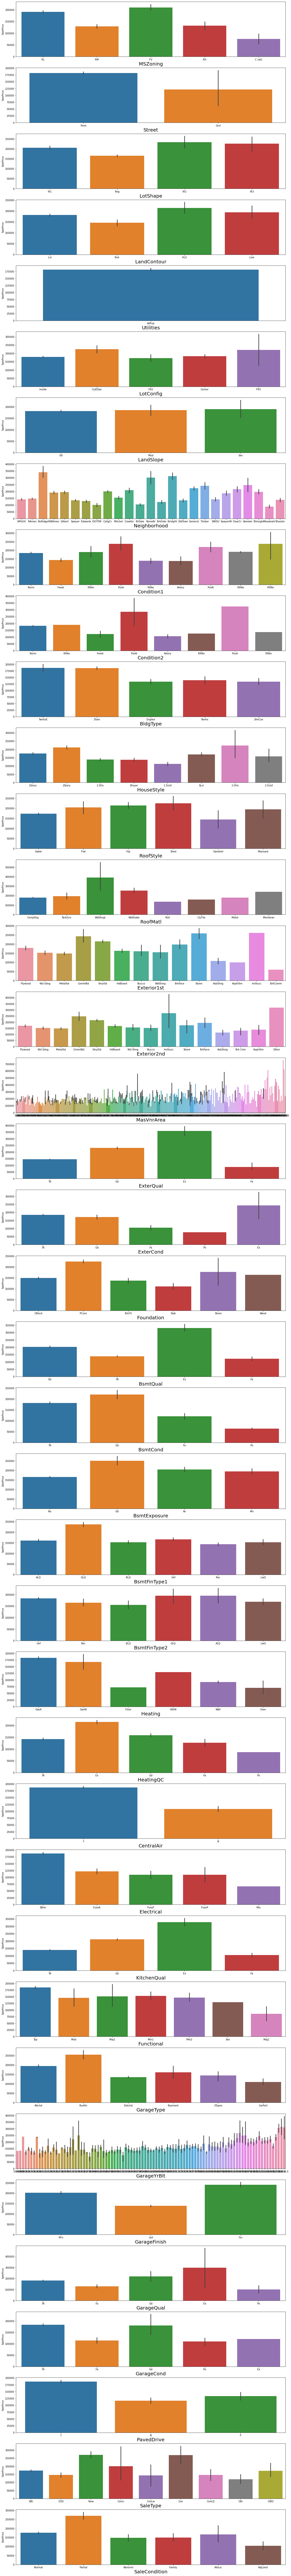

In [186]:

plt.figure(figsize=(20,200),facecolor ='white')
plotnum = 1
for col in train_df[train_df.columns[train_df.dtypes == 'object']]:
    if plotnum<=40:
        plt.subplot(40,1,plotnum)
        sns.barplot(x=train_df[col],y=train_df.SalePrice)
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

- In MSZoning most of the sale price is contributed by FV
- Most of streetw which are contributed in high sale price is Pvae type streets
- High sale price is also contributed by having the LotShape of the house as IR2 followed by IR3 and IR1
- High sale price is contributed bu having LandContour as HLS followed by Low and Lvl type
- LotConfig feature has high sale price when the config type is either FR3 or CulDSac
- Landslope feature is contributing equally in sale price
- Neighbourhood feature of saleprice is highly contributing with variable NoRidge
- In Condition1 and Condition2 feature the sale price is high when the variable is POSA followed by PosN
- BldgType feature with variable TwnhsE,1Fam contributing more for the saleprice
- HouseStyle with 2.5Fin, 2Story are contrbuting more in house sale price
- Roofstyle with Shed type followed by Hip,Flat, Mansard are contributing more for the saleprice
- The house with RoofMatl WidShngl is contributing the high cost in the saleprice
- Exterior1st feature with Stone,CemntBd type are contributing more for the house sale price
- Exterior2nd feature with Other,ImStucc type are contributing more for the house sale price
- ExterQual feature with Ex type is contributing more for the saleprice
- ExterCond feature with Ex type is contributing more for the saleprice and variable Po is contributing less with saleprice
- Foundation feature with Pconc is contributing more with the saleprice
- BsmtQual with ex type has the high sale price
- BsmtCond with Gd TYPE HAS THE high sale price
- BsmtExposure with Gd type has the high sale price
- BsmtFinType1 feature  with GLQ has the high sale price
- BsmtFinType1 feature  with GLQ,ALQ has the high sale price
- Heating Feature with GasA type is having teh high sale price
- HeatingQC feature with Ex type is contributing more for saleprice
- High sale price for houses will happen when there is central air conditioning system
- KitchenQual with Ex type is contributing more for the sale price
- Functional feature with Typ type is contributing more for sale price
- Builtin Garage type is having high saleprice whereas Detchd type has less contribution for sale price
- GarageFinish with Fin type has high contribution towards saleprice
- GarageQual with Gd type has high saleprice
- GarageCond with Gd type is contributing more for saleprice
- Yes paved drive is contributing more for sale price
- saletype with New,Con type has high saleprices
- Partial condition is having high sale price

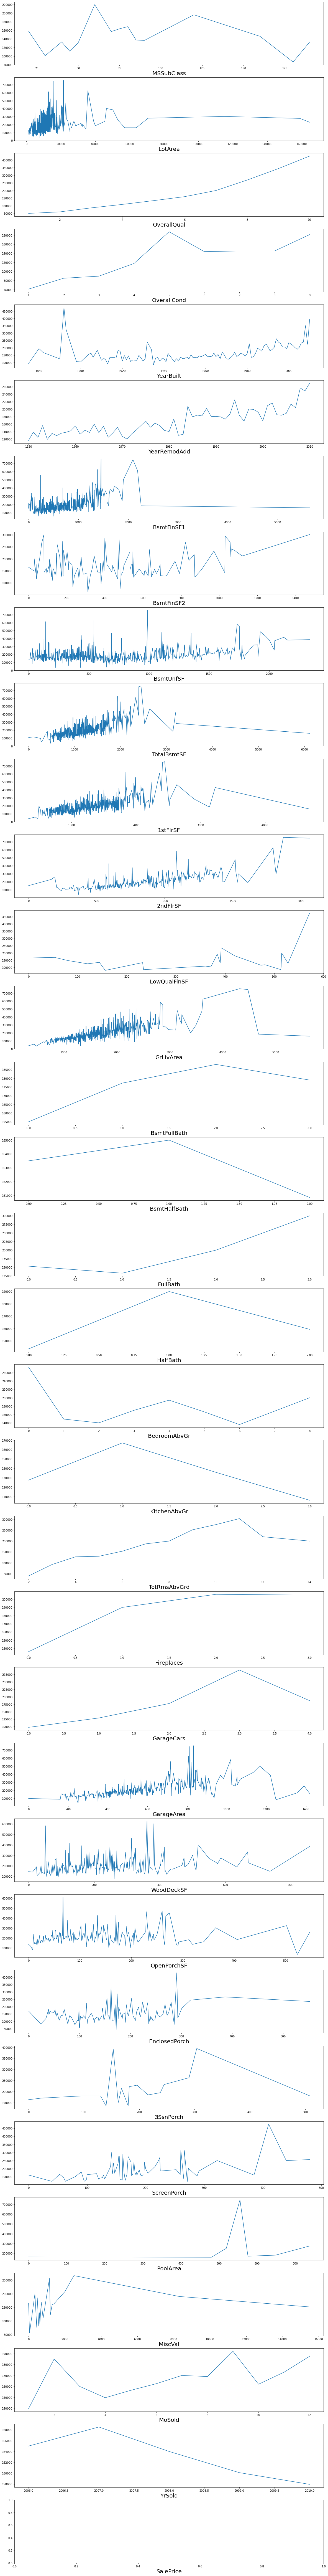

In [187]:
plt.figure(figsize=(20,200),facecolor ='white')
plotnum = 1
for col in train_df[train_df.columns[train_df.dtypes == 'int64']]:
    if plotnum<=40:
        plt.subplot(40,1,plotnum)
        a = train_df.groupby(col).median()
        try:
            a['SalePrice'].plot()
        except:
            pass
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

- LotFrontage when b/w 150-170 has high saleprice
- MasVnrArea when from 1200 -1300 has hig sale price

#### Extracting the ages, remodeled house, garage age of the houses so it gives good insights to target variable

In [188]:
train_df['House_age'] = train_df['YearBuilt'].apply(lambda y: 2021 -y)
train_df['Remod_Age'] = train_df['YearRemodAdd'].apply(lambda y: 2021 -y)
train_df['Garage_age'] = train_df['GarageYrBlt'].apply(lambda y: 2021 -y)
test_df['House_age'] = test_df['YearBuilt'].apply(lambda y: 2021 -y)
test_df['Remod_Age'] = test_df['YearRemodAdd'].apply(lambda y: 2021 -y)
test_df['Garage_age'] = test_df['GarageYrBlt'].apply(lambda y: 2021 -y)

#### Dropping the columns after ages extraction

In [189]:
train_df.drop(columns=['YearBuilt','YearRemodAdd','GarageYrBlt'],axis=1,inplace=True)
test_df.drop(columns=['YearBuilt','YearRemodAdd','GarageYrBlt'],axis=1,inplace=True)



#### Label Encoding Object related columns

In [190]:
from sklearn.preprocessing import LabelEncoder
encodr = LabelEncoder()
for col in train_df[train_df.columns[train_df.dtypes == 'object']]:
    train_df[col] = encodr.fit_transform(train_df[col])
for col in test_df[test_df.columns[test_df.dtypes == 'object']]:
    test_df[col] = encodr.fit_transform(test_df[col])

In [191]:
#mapping yrsold and utilities to custom labels as they are numeric type
train_df['YrSold'] = train_df.YrSold.map({2007:2,2009:4,2006:1, 2008: 3, 2010: 5}) # encoding years in YrSold Column
train_df['Utilities'] = train_df.Utilities.map({0:1})
test_df['YrSold'] = test_df.YrSold.map({2007:2,2009:4,2006:1, 2008: 3, 2010: 5}) # encoding years in YrSold Column
test_df['Utilities'] = test_df.Utilities.map({0:1})

In [192]:
train_df.sample()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
831         180         4         21.0     1491       1         3   

     LandContour  Utilities  LotConfig  LandSlope  ...  PoolArea  MiscVal  \
831            3          1          4          0  ...         0        0   

     MoSold  YrSold  SaleType  SaleCondition  SalePrice  House_age  Remod_Age  \
831       5       5         8              4      75500         49         49   

     Garage_age  
831        15.0  

[1 rows x 74 columns]

#### Checking for outliers

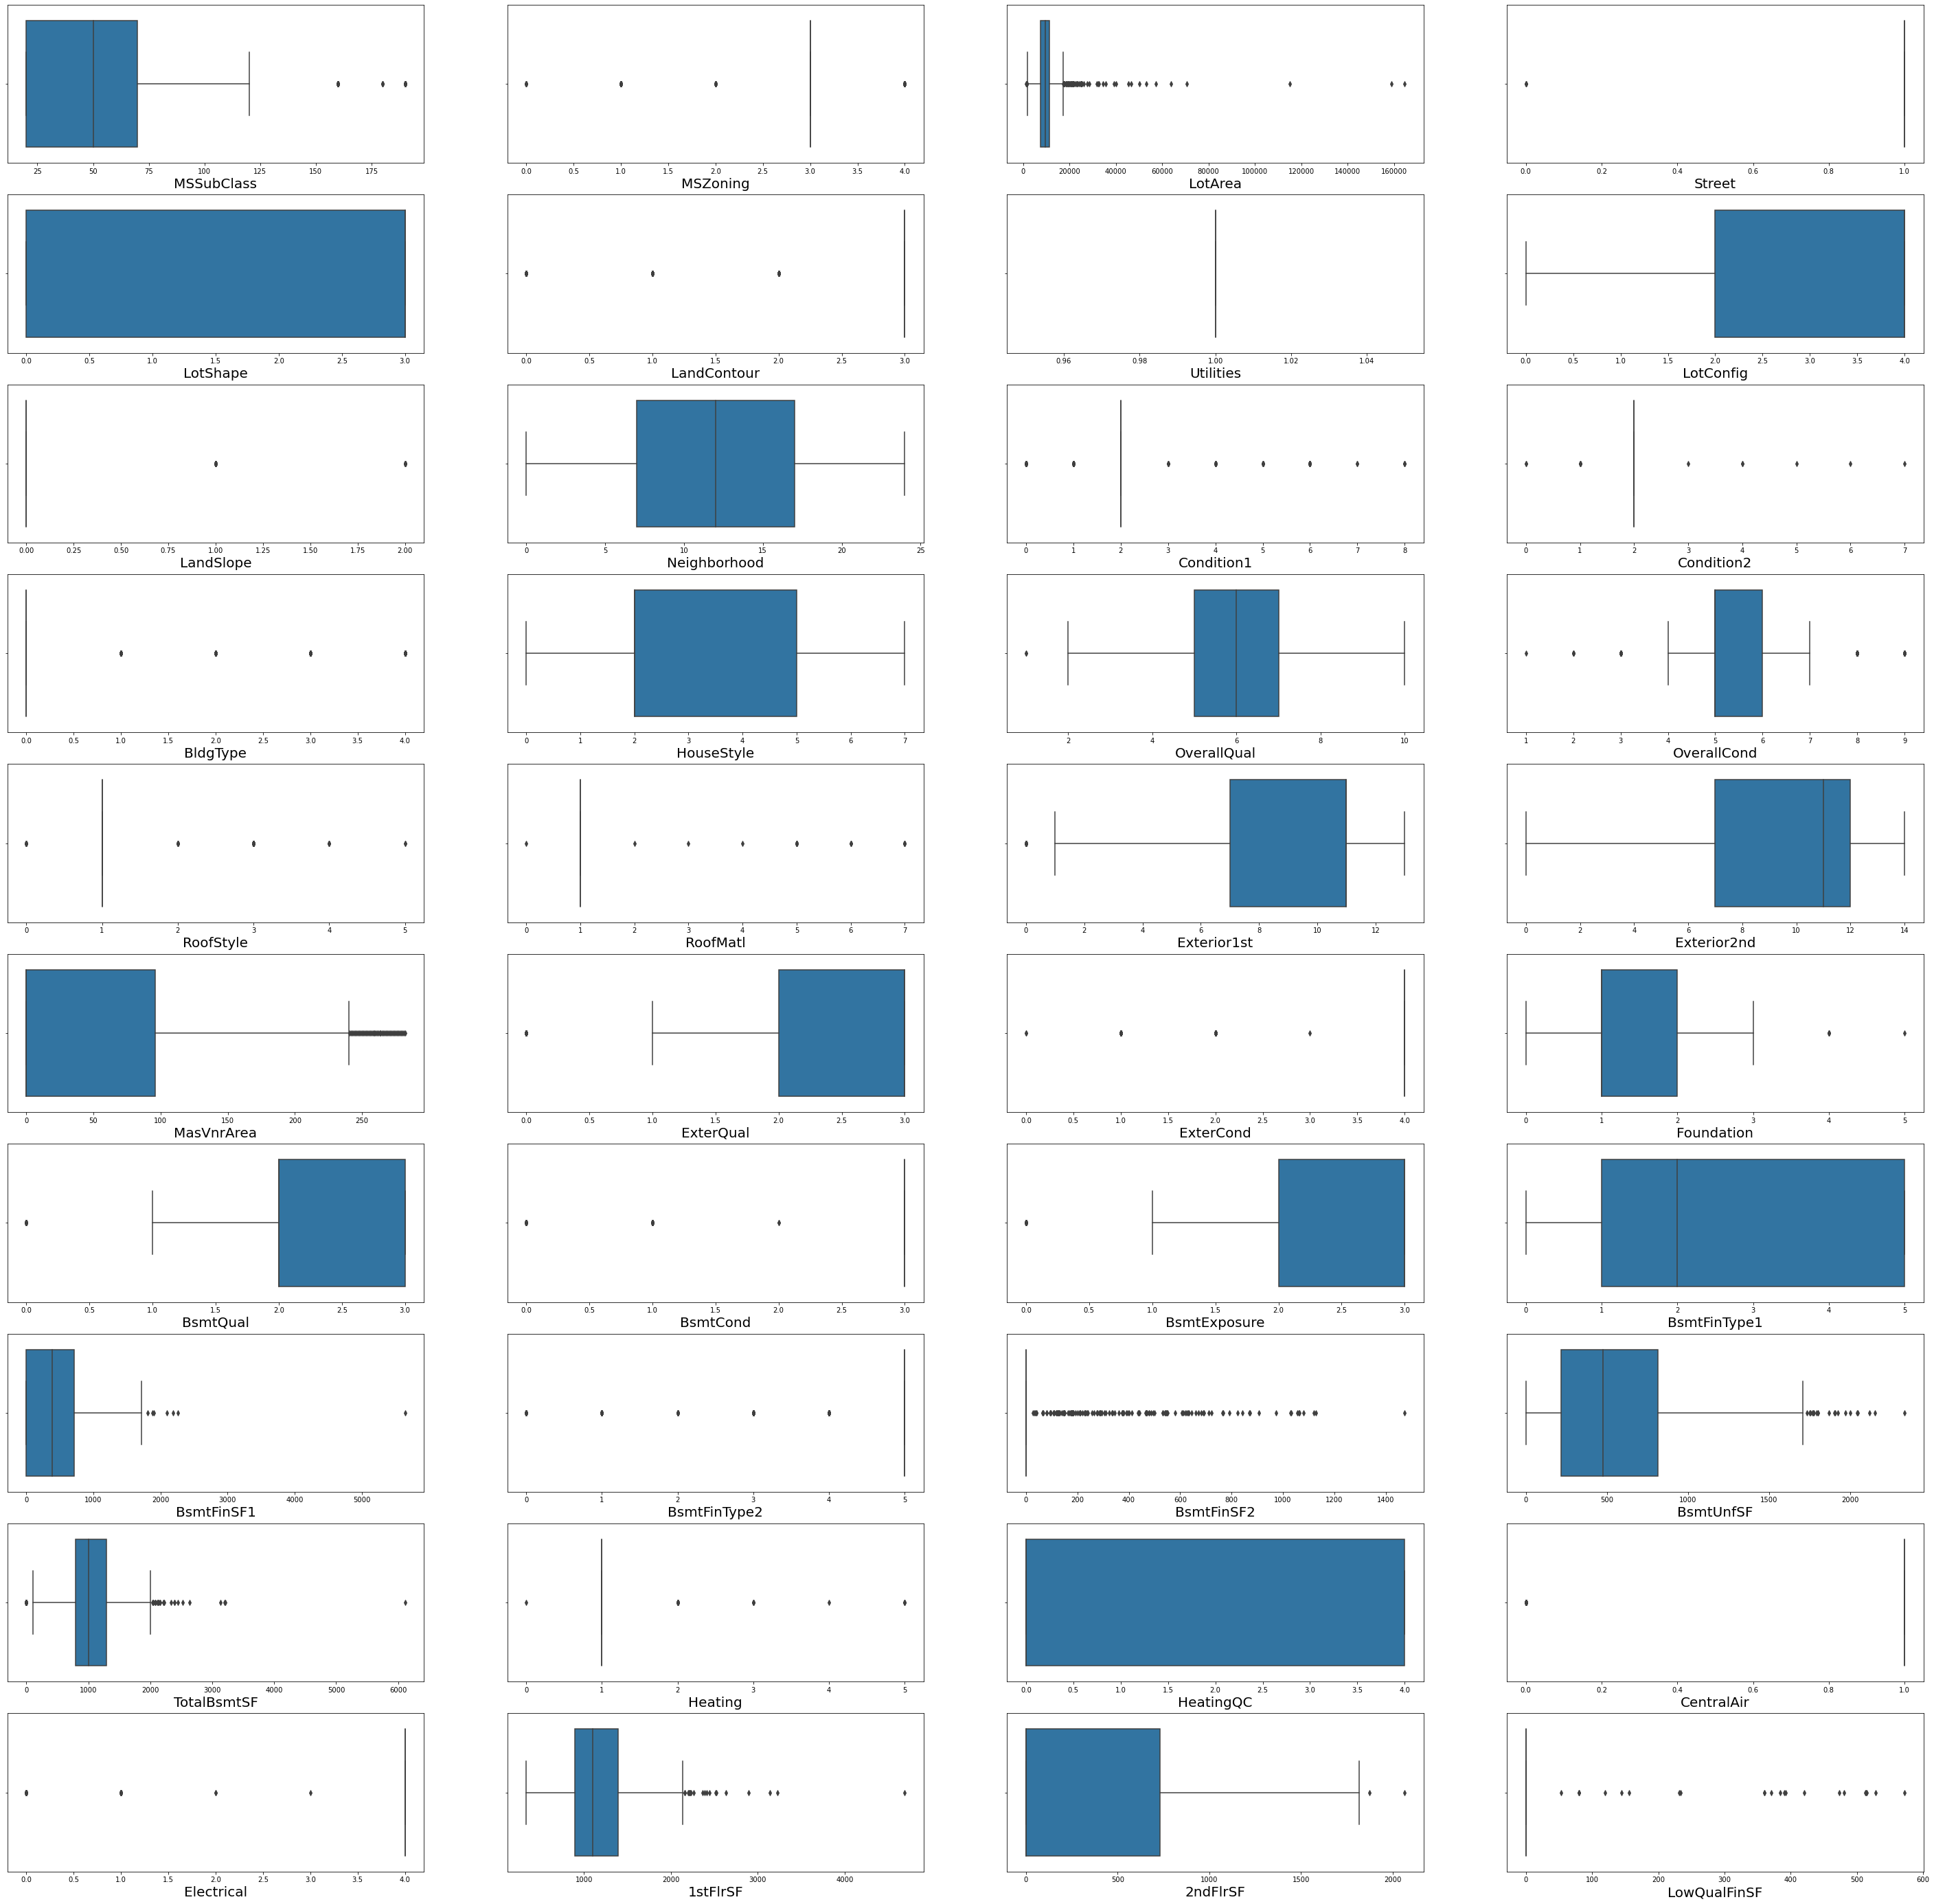

In [193]:
plt.figure(figsize=(50,50),facecolor='white')
plotnum = 1
for feature in train_df[train_df.columns[train_df.dtypes == 'int64']]:
    if plotnum <= 40:
        plt.subplot(10,4,plotnum)
        sns.boxplot(train_df[feature])
        plt.xlabel(feature,fontsize=20)
    plotnum+=1
plt.show()

<AxesSubplot:xlabel='LotFrontage'>

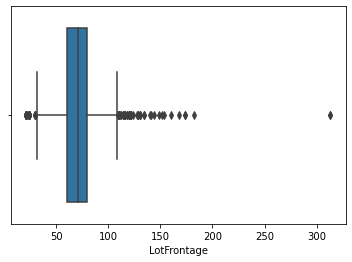

In [194]:
sns.boxplot(train_df['LotFrontage'])

- we have outliers in all the features

#### Remving Outliers
###### Using z-score method

In [195]:
zscore_df = train_df[['LotFrontage','MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'House_age',
       'Remod_Age', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice']]

In [196]:
# Applying z-score method
from scipy.stats import zscore
zscore_abs = np.abs(zscore(zscore_df))
#THreshold is taken as +3/-3
zdf = zscore_df[(zscore_abs < 3).all(axis=1)]

In [197]:
train_df.shape

(1168, 74)

In [198]:
zdf.shape

(814, 35)

In [199]:
# Checking data loss after using z-score
print((1168-814)/1168 * 100)

30.30821917808219


- we have 30% of data loss after performing z-score which is not in considerable range

##### Using IQR method

In [200]:

# Creating a function to remove outlier
"""Takes the dataframe and removed the outliers and will return back"""
outlier_index = np.array([])
for column in zscore_df:
    q1 = zscore_df[column].quantile(0.25)
    q3 = zscore_df[column].quantile(0.75)
    IQR = q3-q1
    col = zscore_df[column]
    indx = col[(col > q3+1.5*IQR) | (col < q1-1.5*IQR)].index
    outlier_index = np.append(outlier_index,indx)
outlier_index

array([  12.,   19.,   35., ..., 1032., 1064., 1150.])

In [201]:
print(zscore_df.shape)
new_df = zscore_df.drop(outlier_index)
print(new_df.shape)

(1168, 35)
(471, 35)


In [202]:
# Checking data loss after using IQR
print((1168-471)/1168 * 100)

59.67465753424658


- Not at all in considerable range

- Leaving outliers as it is

#### Checking skewness of the data

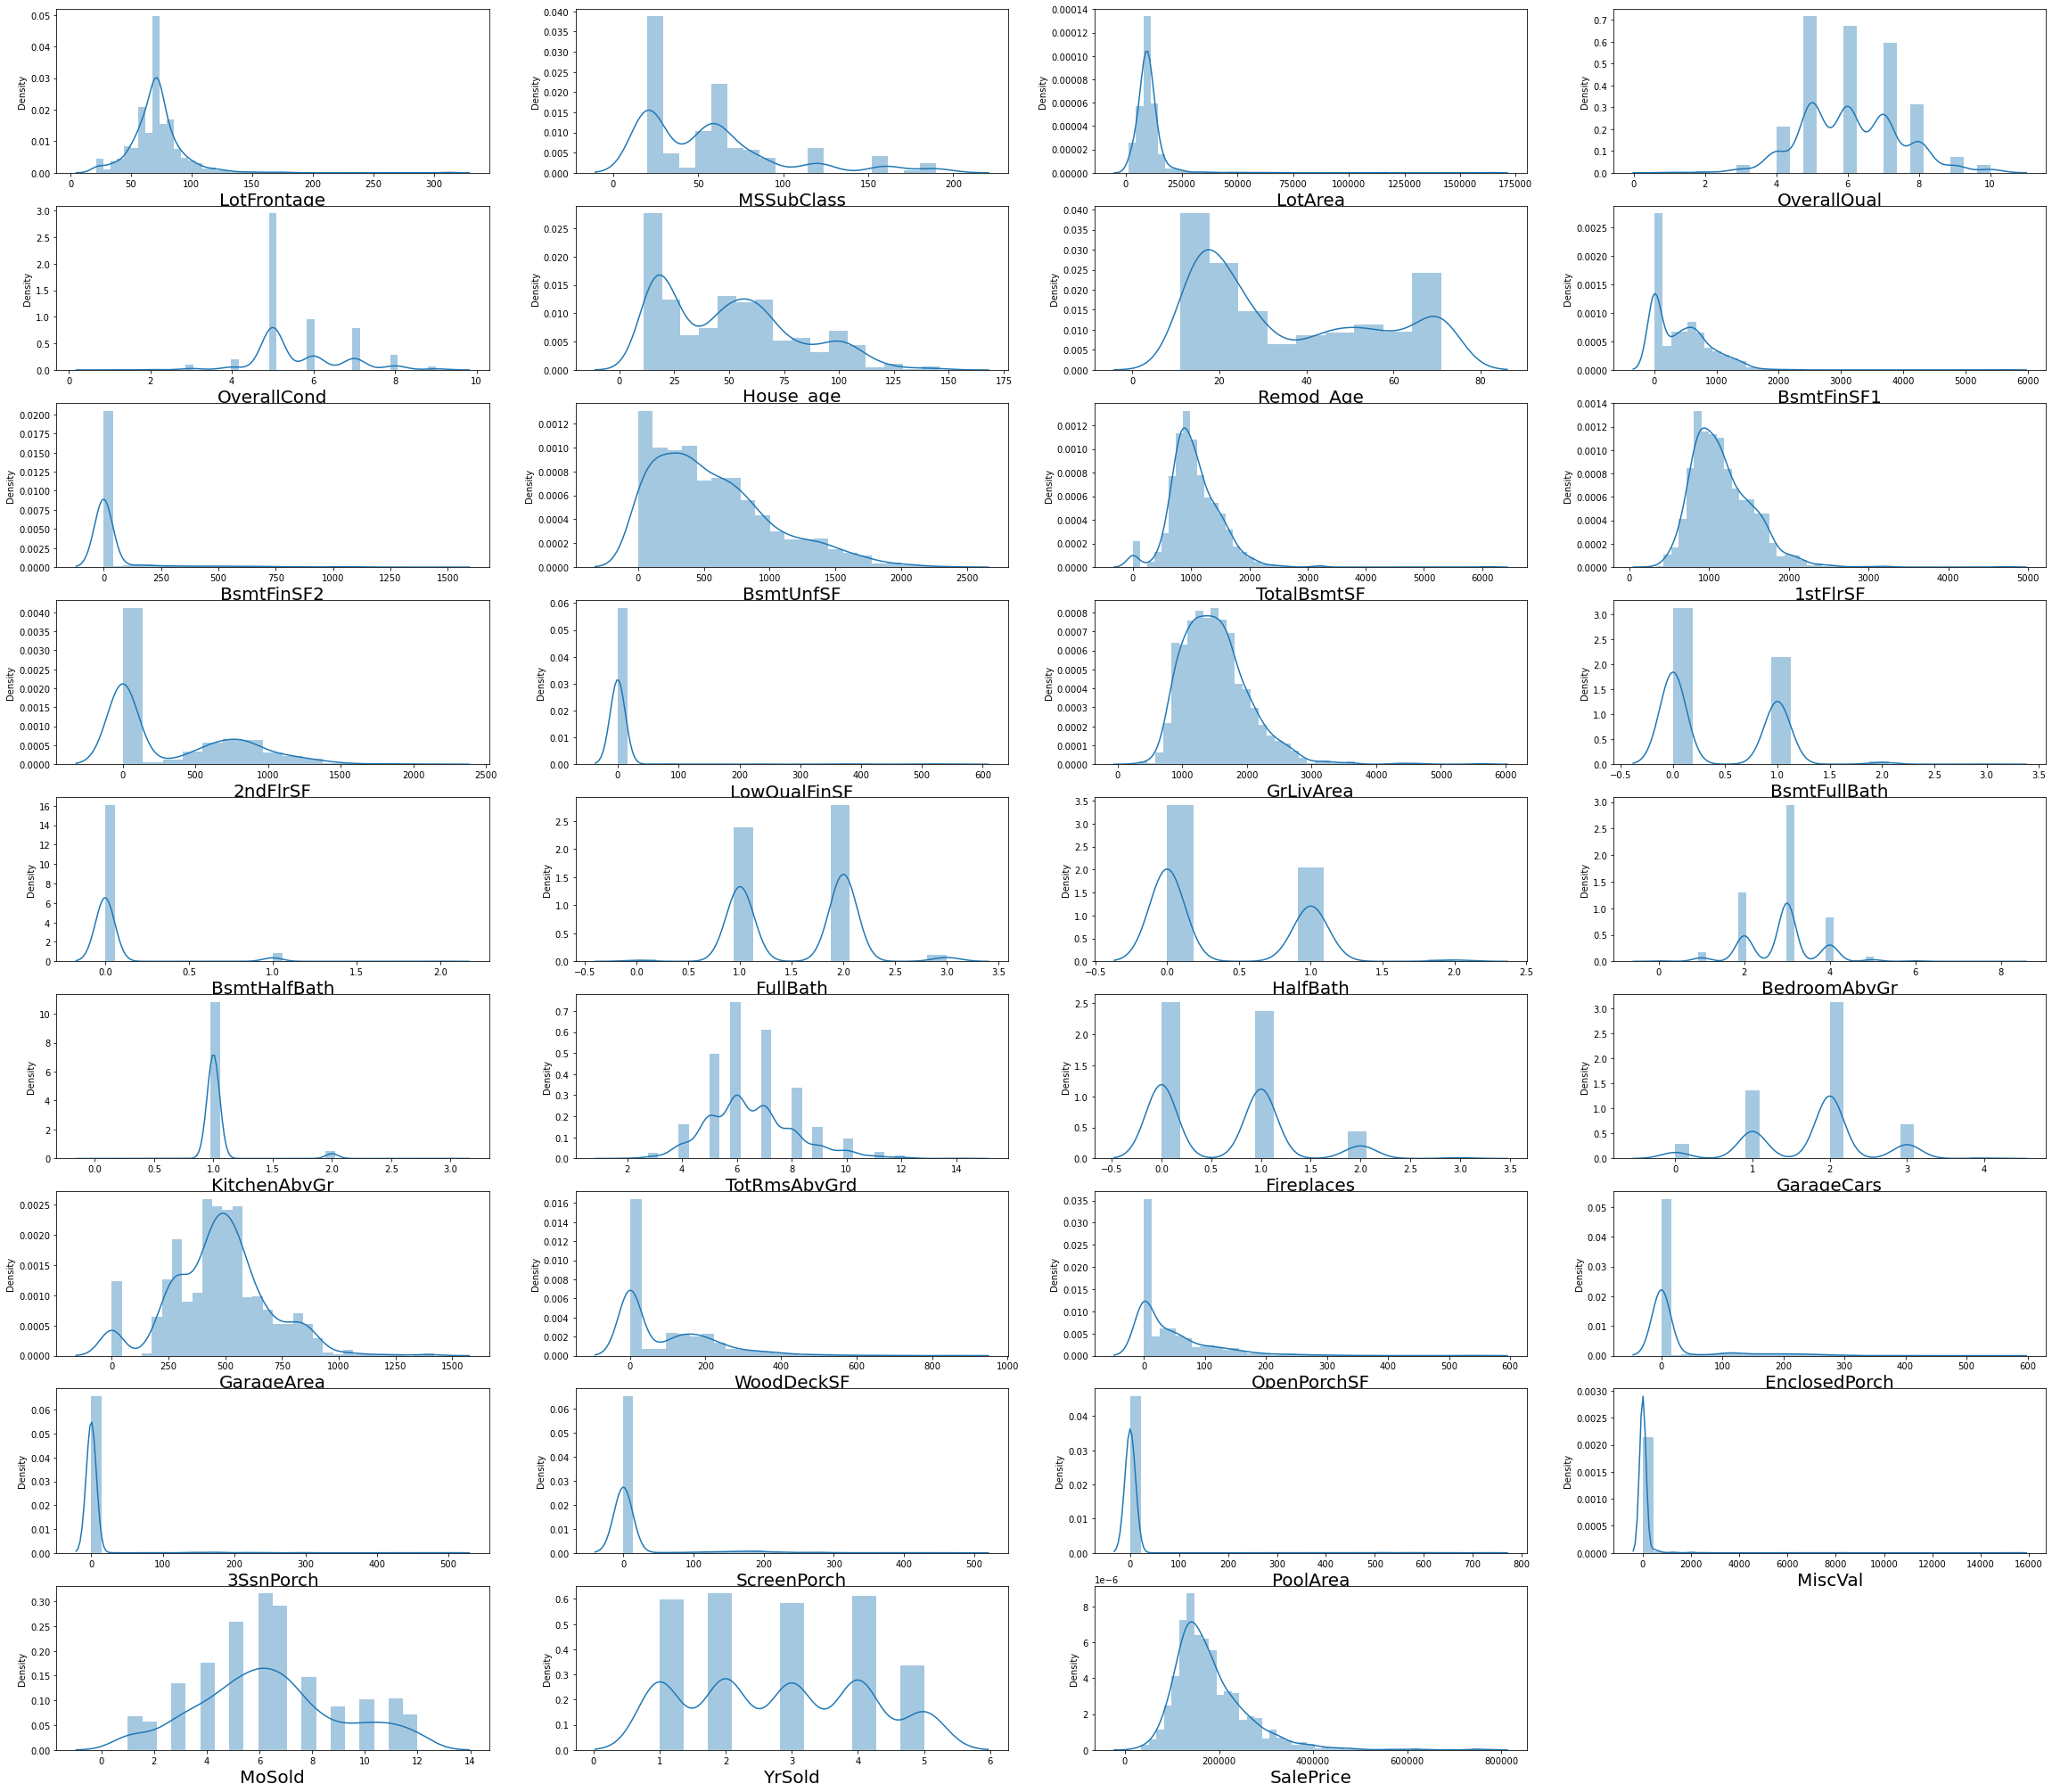

In [203]:
plt.figure(figsize=(40,40),facecolor='white')
plotnum = 1
for i in zscore_df.columns:
    if plotnum <=40:
        plt.subplot(10,4,plotnum)
        sns.distplot(zscore_df[i])
        plt.xlabel(i,fontsize=20)
    plotnum+=1
plt.show()

- Lot of the data are right skewed in the dataframe
- Some of the columns are multinodal 

In [204]:
zscore_df.skew()

LotFrontage       2.710383
MSSubClass        1.422019
LotArea          10.659285
OverallQual       0.175082
OverallCond       0.580714
House_age         0.579204
Remod_Age         0.495864
BsmtFinSF1        1.871606
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
1stFlrSF          1.513707
2ndFlrSF          0.823479
LowQualFinSF      8.666142
GrLivArea         1.449952
BsmtFullBath      0.627106
BsmtHalfBath      4.264403
FullBath          0.057809
HalfBath          0.656492
BedroomAbvGr      0.243855
KitchenAbvGr      4.365259
TotRmsAbvGrd      0.644657
Fireplaces        0.671966
GarageCars       -0.358556
GarageArea        0.189665
WoodDeckSF        1.504929
OpenPorchSF       2.410840
EnclosedPorch     3.043610
3SsnPorch         9.770611
ScreenPorch       4.105741
PoolArea         13.243711
MiscVal          23.065943
MoSold            0.220979
YrSold            0.115765
SalePrice         1.953878
dtype: float64

#### Skewness removal using power transformer method

In [205]:
from sklearn.preprocessing import PowerTransformer
power_transform = PowerTransformer(method = 'yeo-johnson', standardize=True)
nor_df = zscore_df.copy()
transformed= power_transform.fit_transform(nor_df)
transformed = pd.DataFrame(transformed, columns=nor_df.columns)
transformed

LotFrontage  MSSubClass   LotArea  OverallQual  OverallCond  House_age  \
0        0.093658    1.370435 -1.213954    -0.052799    -0.496528   0.069190   
1        1.117135   -1.167999  1.100521     1.345826     0.407009   0.263870   
2        0.998803    0.490047  0.158048     0.656375    -0.496528  -0.767713   
3        1.495566   -1.167999  0.496002    -0.052799     0.407009   0.034868   
4        0.093658   -1.167999  1.196626    -0.052799     1.234321   0.034868   
5       -0.552490    0.490047  0.855555     0.656375    -0.496528  -1.398048   
6        0.093658   -1.167999  0.424957    -0.785224     0.407009   0.632651   
7        0.837233   -1.167999  0.717859    -0.785224    -1.498082   0.632651   
8        0.047197   -1.167999  0.001967    -0.785224     1.234321   0.413301   
9        0.499839    0.237618 -0.152859    -0.785224    -0.496528   0.879341   
10      -0.996296    0.237618 -0.125083    -0.052799     0.407009   1.101890   
11      -1.358798    0.490047  0.082104     0.656375     0.407009  -1.182964   
12       2.320316   -1.167999  0.007580     0.656375    -0.496528  -1.182964   
13       0.499839   -1.167999 -0.059020    -0.785224    -0.496528   0.552965   
14      -0.499737    0.237618  1.175905    -0.785224     1.234321   0.684216   
15      -0.714204    0.696557  0.288554    -0.052799     1.234321   1.381821   
16       0.093658   -0.517772 -0.867869    -0.052799     2.000294   1.245955   
17      -0.243934   -1.167999 -0.444308     0.656375    -0.496528  -1.476644   
18       0.093658   -1.167999 -0.288429    -0.052799     1.234321   0.069190   
19      -2.852857    1.700798 -2.912039    -0.785224    -0.496528   0.263870   
20       0.499839    0.490047  0.609390     0.656375    -0.496528  -1.053715   
21       0.047197    0.947809 -0.161031    -0.785224     1.234321   0.200991   
22      -0.048066   -1.167999  0.116951    -0.785224     0.407009   0.808136   
23       0.093658   -1.167999  0.301127    -0.785224     0.407009   0.525744   
24       0.094197   -1.167999  0.014897    -0.785224     2.000294   0.413301   
25       0.093658   -1.167999  1.671772    -0.052799    -0.496528   0.734610   
26       0.093658   -0.517772  2.057977    -0.785224     1.234321   1.474408   
27       0.837233   -1.167999  0.434278     2.018219    -3.956473  -1.739548   
28      -0.552490    0.087651 -0.711978    -0.785224     0.407009   1.400621   
29       0.232782    0.696557  0.535991    -0.052799     1.234321   1.164709   
30      -0.395865    1.370435 -0.353935     2.018219    -0.496528  -1.323143   
31      -0.447534    0.490047 -1.938818     0.656375     2.000294   0.902589   
32       0.093658    1.019927  1.455304    -0.785224    -0.496528   0.034868   
33       0.093658    0.237618  0.596929    -0.785224     0.407009   1.015421   
34       0.093658    0.490047  0.954745    -0.785224     0.407009   0.855853   
35       2.023246   -1.167999  0.243651    -0.785224     0.407009   0.102942   
36       0.499839   -1.167999  0.252097     0.656375    -0.496528   0.069190   
37       0.671032   -1.167999  0.638233    -0.052799     1.234321   0.808136   
38       0.093658    0.947809 -0.384488    -0.052799     0.407009  -0.000046   
39      -0.996296   -0.083577 -0.013221    -0.785224     0.407009   1.245955   
40       2.696946   -1.167999  2.526886    -0.052799    -0.496528   0.552965   
41       0.047197   -1.167999  0.744499    -0.785224     1.234321   0.658584   
42      -2.343523    1.700798 -2.053746     0.656375    -0.496528  -1.323143   
43      -2.852857    1.700798 -2.492280    -0.052799    -0.496528  -1.251555   
44      -0.194273    0.870404 -0.175117    -0.785224     2.000294   0.034868   
45       0.323246   -1.167999 -0.191910    -0.785224     1.234321  -0.146122   
46      -0.447534    0.490047 -0.237781    -0.052799    -0.496528  -0.992614   
47       1.309296   -1.167999  0.537996    -0.785224     1.234321   0.855853   
48      -0.996296   -1.167999 -1.185895    -4.093567    -2.631776   0.902589   
49    

In [206]:
transformed.index = train_df.index
train_df[['LotFrontage','MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'House_age',
       'Remod_Age', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice']] = transformed[['LotFrontage','MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'House_age',
       'Remod_Age', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice']]
train_df.skew()

MSSubClass        0.064007
MSZoning         -1.796785
LotFrontage       0.161368
LotArea           0.032509
Street          -17.021969
LotShape         -0.603775
LandContour      -3.125982
Utilities         0.000000
LotConfig        -1.118821
LandSlope         4.812568
Neighborhood      0.043735
Condition1        3.008289
Condition2       11.514458
BldgType          2.318657
HouseStyle        0.285680
OverallQual       0.021658
OverallCond       0.048063
RoofStyle         1.498560
RoofMatl          7.577352
Exterior1st      -0.612816
Exterior2nd      -0.592349
MasVnrArea        1.355502
ExterQual        -1.810843
ExterCond        -2.516219
Foundation       -0.002761
BsmtQual         -1.343781
BsmtCond         -3.293554
BsmtExposure     -1.166987
BsmtFinType1     -0.068901
BsmtFinSF1       -0.404528
BsmtFinType2     -3.615783
BsmtFinSF2        2.394737
BsmtUnfSF        -0.284390
TotalBsmtSF       0.286779
Heating          10.103609
HeatingQC         0.449933
CentralAir       -3.475188
E

- most of the skewness is removed from the data

In [207]:
zscore_test_df = test_df[['LotFrontage','MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'House_age',
       'Remod_Age', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold']]
from sklearn.preprocessing import PowerTransformer
power_transform = PowerTransformer(method = 'yeo-johnson', standardize=True)
nor_df = zscore_test_df.copy()
transformed= power_transform.fit_transform(nor_df)
transformed = pd.DataFrame(transformed, columns=nor_df.columns)
transformed.index = test_df.index
test_df[['LotFrontage','MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'House_age',
       'Remod_Age', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold']] = transformed[['LotFrontage','MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'House_age',
       'Remod_Age', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold']]
test_df.skew()

MSSubClass        0.089921
MSZoning          0.187174
LotFrontage       0.096846
LotArea           0.003111
Street          -12.020386
LotShape         -0.639195
LandContour      -3.332422
Utilities         0.000000
LotConfig        -1.204667
LandSlope         4.639043
Neighborhood      0.046894
Condition1        2.808950
Condition2       17.088007
BldgType          1.997202
HouseStyle        0.386773
OverallQual      -0.002016
OverallCond      -0.079098
RoofStyle         1.386333
RoofMatl         13.717569
Exterior1st      -0.643455
Exterior2nd      -0.672944
MasVnrArea        1.226236
ExterQual        -1.920606
ExterCond        -3.595056
Foundation        0.380626
BsmtQual         -1.348604
BsmtCond         -4.869596
BsmtExposure     -1.289092
BsmtFinType1      0.040656
BsmtFinSF1       -0.441605
BsmtFinType2     -3.702330
BsmtFinSF2        2.570199
BsmtUnfSF        -0.232099
TotalBsmtSF      -0.037982
Heating           8.212666
HeatingQC         0.408904
CentralAir       -3.792878
E

#### Finding Correlation

<AxesSubplot:>

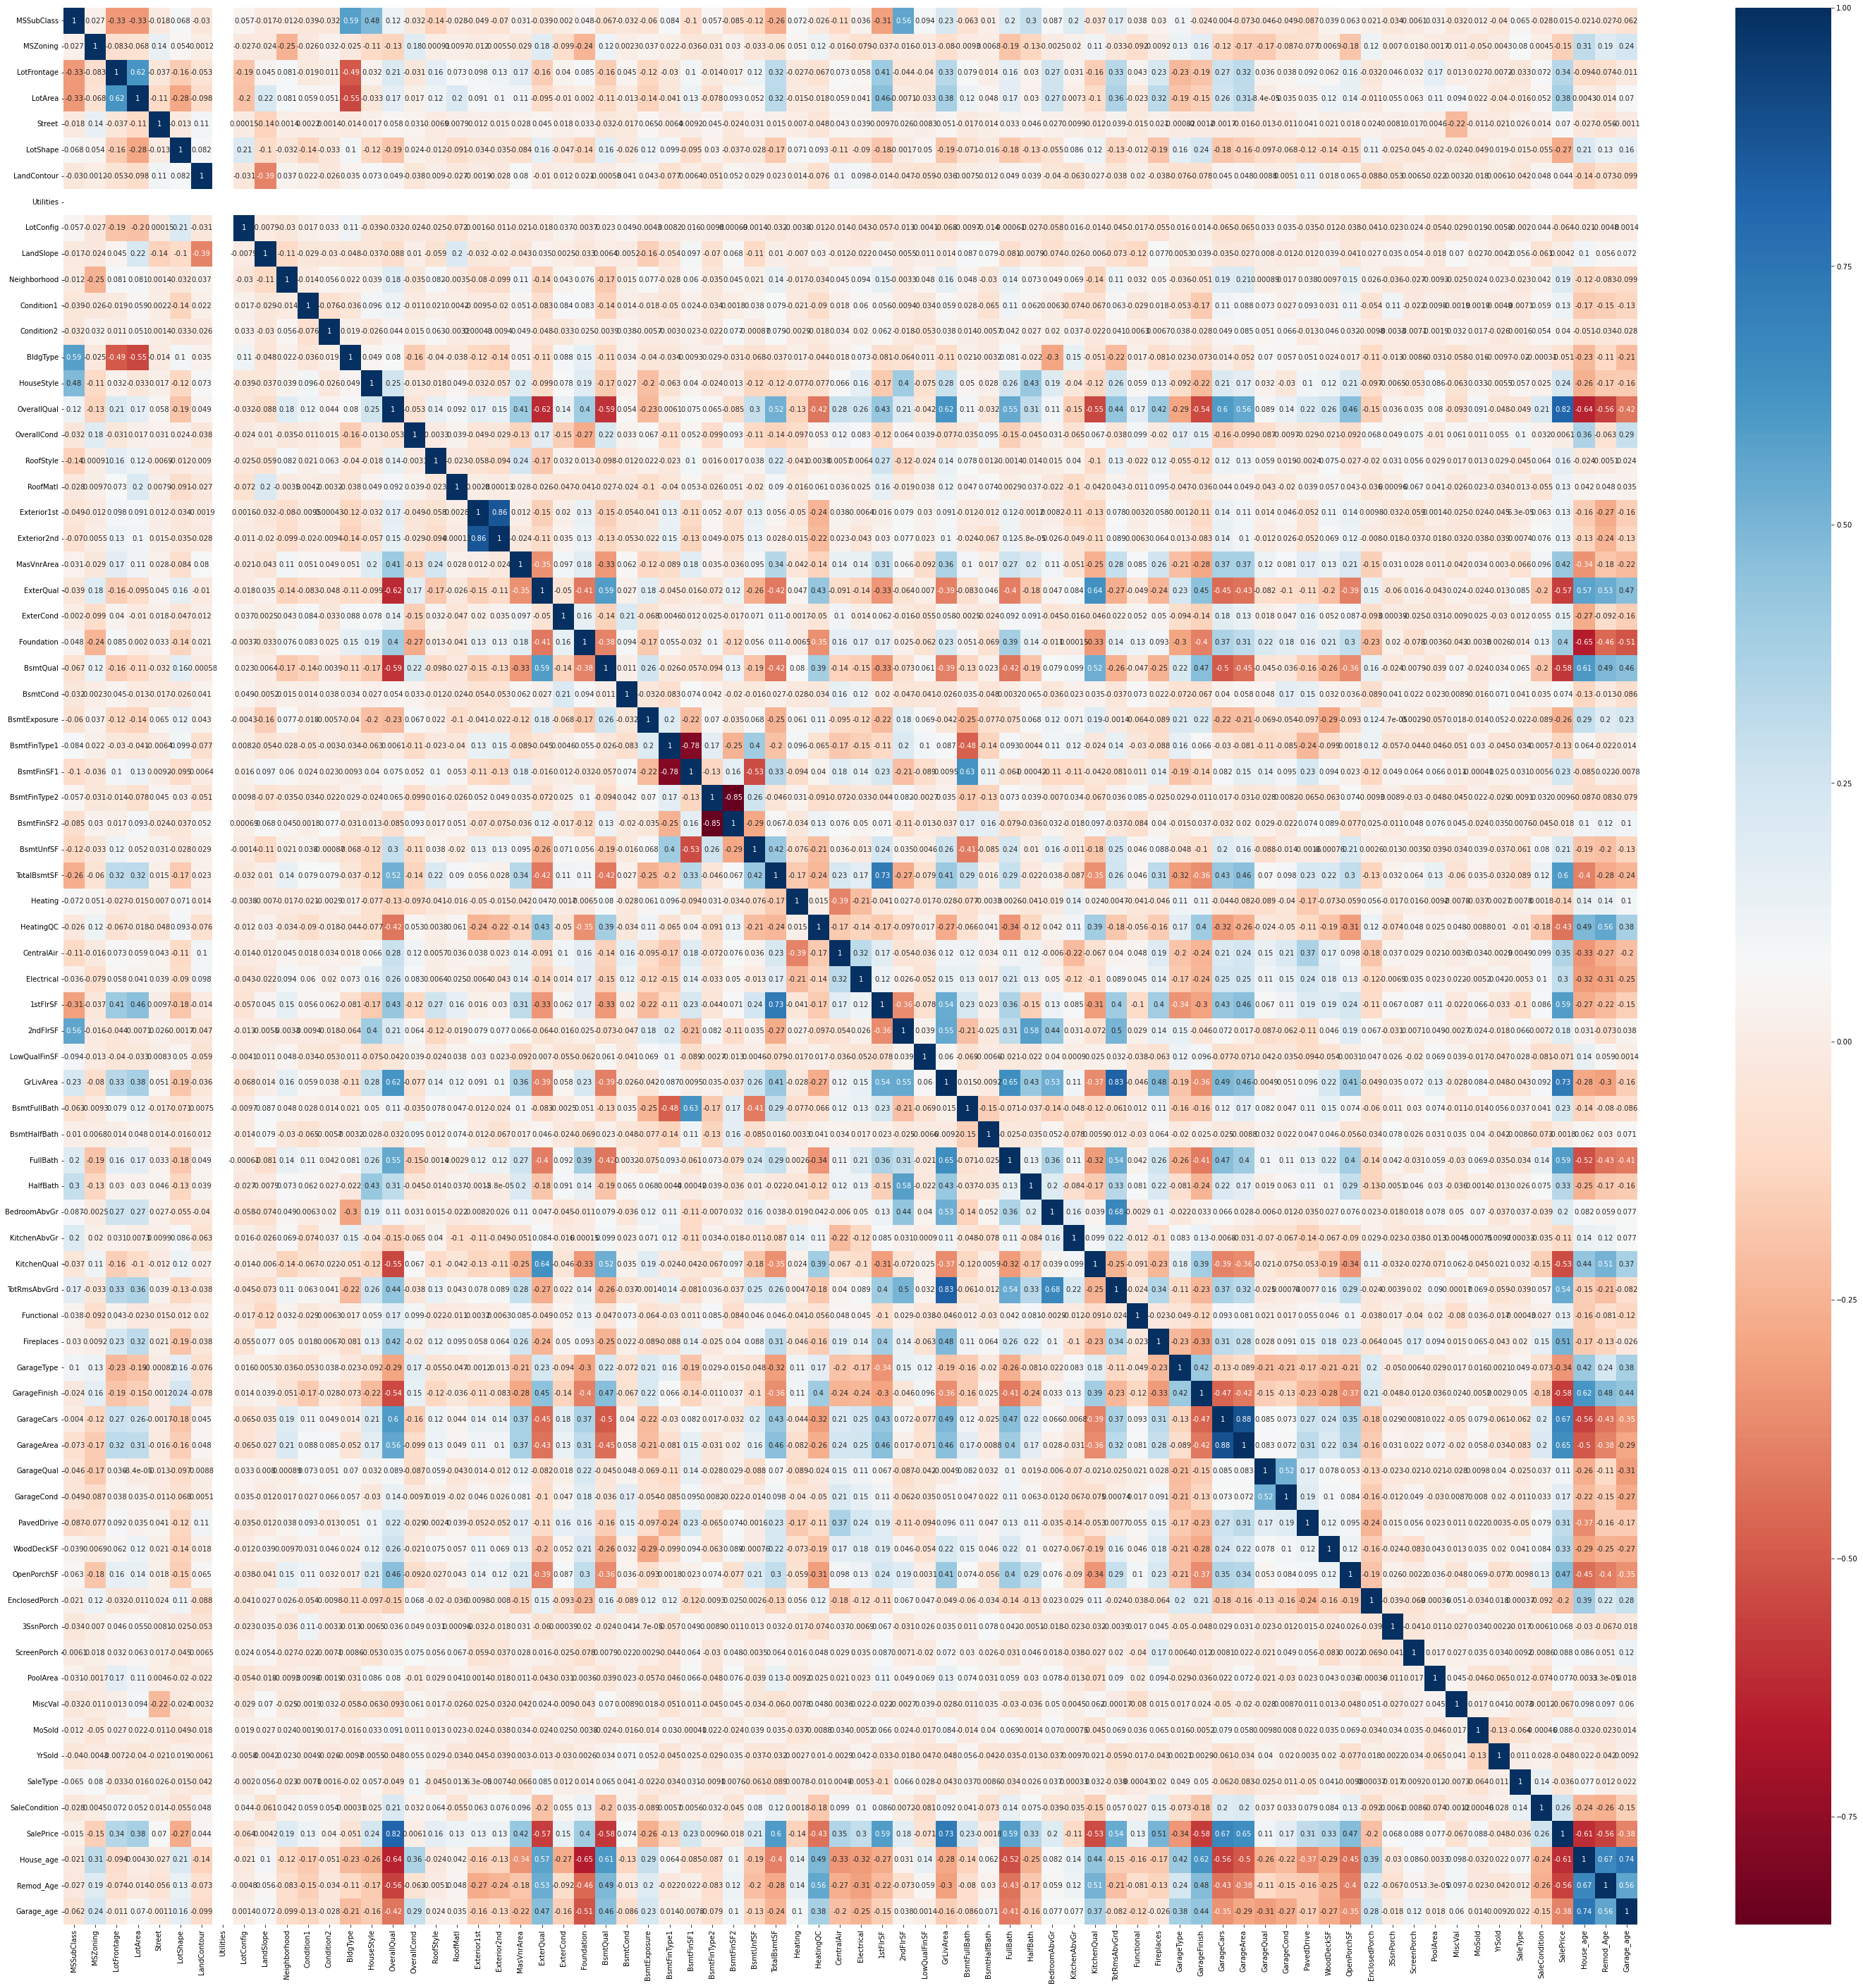

In [208]:
plt.figure(figsize=(50,50))
sns.heatmap(train_df.corr(),annot=True,cmap='RdBu')

- Max Number of features are positively correlated with SalePrice
- Yearbuild is negatively correlated with EnclosedPorch
- BsmtUnfsF is negatively correlated with BsmtFullBath
- ExternalQual,BsmtQual,KitchenQual, GarageFinish is negatively correlated with saleprice 

#### Dropping utilities folde as it is not much useful for model creation

In [209]:
train_df.drop('Utilities',axis=1,inplace=True)
test_df.drop('Utilities',axis=1,inplace=True)

#### Feature selection

In [210]:
x = train_df.drop(columns=['SalePrice'])
y = train_df['SalePrice']

#### STANDARDIZATION

In [211]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scaled_x = scalar.fit_transform(x)

#### Checking for multicollinearity using variation inflation factor

In [212]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Features"] = x.columns
vif['vif'] = [variance_inflation_factor(scaled_x,i) for i in range(scaled_x.shape[1])]

In [213]:
vif

Features        vif
0      MSSubClass   6.044518
1        MSZoning   1.398651
2     LotFrontage   2.174025
3         LotArea   2.877675
4          Street   1.178426
5        LotShape   1.291252
6     LandContour   1.327374
7       LotConfig   1.156893
8       LandSlope   1.490095
9    Neighborhood   1.268704
10     Condition1   1.160713
11     Condition2   1.091204
12       BldgType   4.716699
13     HouseStyle   2.630443
14    OverallQual   4.156205
15    OverallCond   1.986351
16      RoofStyle   1.298834
17       RoofMatl   1.217613
18    Exterior1st   4.351466
19    Exterior2nd   4.354228
20     MasVnrArea   1.513707
21      ExterQual   2.680869
22      ExterCond   1.216592
23     Foundation   2.145269
24       BsmtQual   2.348394
25       BsmtCond   1.195335
26   BsmtExposure   1.612426
27   BsmtFinType1   3.193777
28     BsmtFinSF1   6.823730
29   BsmtFinType2   4.013764
30     BsmtFinSF2   4.485946
31      BsmtUnfSF   5.170258
32    TotalBsmtSF   6.859491
33        Heating   1.322605
34      HeatingQC   1.733766
35     CentralAir   1.683689
36     Electrical   1.369337
37       1stFlrSF  17.380048
38       2ndFlrSF  18.285876
39   LowQualFinSF   1.445557
40      GrLivArea  28.385208
41   BsmtFullBath   2.271538
42   BsmtHalfBath   1.255496
43       FullBath   3.169298
44       HalfBath   2.462286
45   BedroomAbvGr   2.810868
46   KitchenAbvGr   1.542266
47    KitchenQual   2.064427
48   TotRmsAbvGrd   5.142096
49     Functional   1.272186
50     Fireplaces   1.747848
51     GarageType   1.764933
52   GarageFinish   2.105599
53     GarageCars   5.813480
54     GarageArea   5.786374
55     GarageQual   1.618389
56     GarageCond   1.570713
57     PavedDrive   1.518317
58     WoodDeckSF   1.345842
59    OpenPorchSF   1.620219
60  EnclosedPorch   1.383123
61      3SsnPorch   1.079997
62    ScreenPorch   1.135858
63       PoolArea   1.161983
64        MiscVal   1.147139
65         MoSold   1.082766
66         YrSold   1.091732
67       SaleType   1.124009
68  SaleCondition   1.211032
69      House_age  10.529594
70      Remod_Age   3.321028
71     Garage_age   2.918184

- MSSubClass, BsmtFinSF1, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, GrLivArea, House_age has high multi collinearity

#### Principle Component Analaysis

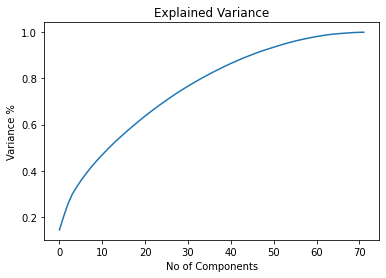

In [214]:
from sklearn.decomposition import PCA
pca = PCA()
principlecomponents = pca.fit_transform(scaled_x)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance')
plt.show()

- 70 components speak about 95% variance in data

#### Selecting k-best features

In [216]:
from sklearn.feature_selection import SelectKBest, f_classif
bestfeat = SelectKBest(score_func=f_classif,k='all')
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featurescores = pd.concat([dfcolumns,dfscores],axis=1)
featurescores.columns=['Feature','Score']
print(featurescores.nlargest(75,'Score'))

          Feature     Score
14    OverallQual  5.209152
21      ExterQual  3.514221
40      GrLivArea  2.956955
24       BsmtQual  2.876879
53     GarageCars  2.695594
69      House_age  2.631224
47    KitchenQual  2.617125
43       FullBath  2.428914
54     GarageArea  2.242545
52   GarageFinish  2.187163
32    TotalBsmtSF  2.070692
37       1stFlrSF  2.060541
70      Remod_Age  1.936489
4          Street  1.835751
33        Heating  1.707885
20     MasVnrArea  1.701313
50     Fireplaces  1.647757
48   TotRmsAbvGrd  1.643046
1        MSZoning  1.640044
59    OpenPorchSF  1.613273
35     CentralAir  1.557680
71     Garage_age  1.535466
23     Foundation  1.528516
5        LotShape  1.407526
3         LotArea  1.405080
28     BsmtFinSF1  1.385210
34      HeatingQC  1.358939
44       HalfBath  1.324900
9    Neighborhood  1.281079
58     WoodDeckSF  1.246439
26   BsmtExposure  1.214154
2     LotFrontage  1.212723
25       BsmtCond  1.190161
17       RoofMatl  1.179426
51     GarageType  1

In [218]:
x.shape

(1168, 72)

#### Selecting best features based on their scores

In [219]:
x_best = x.drop(columns=['SaleType','Condition2','BsmtFinSF2']).copy()
scaled_x_best = scalar.fit_transform(x_best)

#### Model Building
##### Finding best Random State

In [220]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error
import joblib
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV

In [222]:
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size = .33, random_state = i)
    modRF =  RandomForestRegressor()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.8924397101311748 on random_state: 24


In [223]:
models= [RandomForestRegressor(),DecisionTreeRegressor(),XGBRegressor(),Ridge(),SVR(),AdaBoostRegressor(),KNeighborsRegressor()]
x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size=.25,random_state=59)

def compare_models():
    for model in models:
        
        model.fit(x_train,y_train)
        model_predict = model.predict(x_test)
        score_r2 = r2_score(y_test, model_predict)
        mean_error = mean_squared_error(y_test, model_predict)
        crossval_score = cross_val_score(model,scaled_x_best,y,cv=4).mean()
        print("R2 score of the model : ",model,"=",round(score_r2*100,1),"%")
        print("mean squared error for model : ",model,"=",mean_error)
        print("cross val score for model : ",model, "=",crossval_score)
        print('_______________________________________________')
compare_models()

R2 score of the model :  RandomForestRegressor() = 87.1 %
mean squared error for model :  RandomForestRegressor() = 0.12404986872351596
cross val score for model :  RandomForestRegressor() = 0.8543177964627404
_______________________________________________
R2 score of the model :  DecisionTreeRegressor() = 71.2 %
mean squared error for model :  DecisionTreeRegressor() = 0.27647808913929195
cross val score for model :  DecisionTreeRegressor() = 0.7029503817522236
_______________________________________________
R2 score of the model :  XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6

#### Hyper parameter tuning with model RandomForestRegressorm

In [227]:
import warnings
warnings.filterwarnings('ignore')
random_forest_params = {'n_estimators':[30,60,80],
                   'max_depth':[10,20,40],
                   'min_samples_leaf':[1,2,5,10,20,30],
                   'min_samples_split':[5,10,20],
                   'max_features':['auto','sqrt','log2'],
                   'criterion':['mse','mae']
    }
grid_classifier = GridSearchCV(RandomForestRegressor(),random_forest_params,cv=5,n_jobs=-1,verbose=1)
grid_classifier.fit(x_train,y_train)
print(f"The best parameters are {grid_classifier.best_params_}")
print(f"The best Score is {grid_classifier.best_score_}")

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecat

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anac

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecat

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecat

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecat

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecat

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anac

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecat

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecat

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecat

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecat

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecat

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecat

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecat

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecat

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/an

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/an

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/an

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/an

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/an

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/an

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/an

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/an

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/an

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/an

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecat

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecat

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecat

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecat

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecat

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecat

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecat

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecat

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecat

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecat

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecat

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecat

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anac

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecat

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anac

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/an

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/an

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/an

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/an

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/an

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/an

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/an

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/an

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/an

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/an

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/an

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecat

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecat

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anac

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecat

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecat

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecat

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecat

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecat

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecat

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecat

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecat

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecat

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecat

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecat

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecat

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/an

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/an

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/an

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/an

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/an

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/an

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/an

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/an

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/an

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/an

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/an

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/op

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/op

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/op

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/op

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/op

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/op

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/op

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/op

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/op

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/op

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/op

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/op

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/op

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/op

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/op

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/op

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/op

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/op

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/op

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/op

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/op

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/op

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/op

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/op

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/op

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/op

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/op

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/op

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/op

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/op

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/op

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/op

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/op

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/op

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/op

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/op

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/op

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/op

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/op

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/op

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/op

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/op

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/op

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/op

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/op

The best parameters are {'criterion': 'mse', 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 60}
The best Score is 0.8525915175039765


In [228]:
Best_mod1 = RandomForestRegressor(n_estimators=60,criterion='mse',max_depth=40,max_features='sqrt',min_samples_leaf=1,min_samples_split=5)
Best_mod1.fit(x_train,y_train)
rfrpred = Best_mod1.predict(x_test)
acc = r2_score(y_test,rfrpred)
print(acc*100)


85.67670571543046


#### Saving the model

In [229]:
import joblib
joblib.dump(Best_mod1,"Housing.pkl")

['Housing.pkl']

#### Loading the model

In [230]:
mod = joblib.load("Housing.pkl")
print(mod.predict(x_test))

[ 1.51530174e+00  8.12447687e-01 -1.01016992e-01 -2.05854784e-01
  3.17146065e-01  1.27535700e-01  6.27792997e-01  6.14869294e-01
  5.48534873e-01  5.72972118e-01 -1.72002359e-01  4.90603508e-01
 -3.50812007e-01  8.26314924e-01 -3.32780203e-01 -1.18538173e+00
  7.77506346e-03  4.87059062e-01 -9.38102996e-01  1.00032409e+00
  2.63188138e-01 -6.30411738e-01 -6.00447522e-01  5.62138494e-01
  1.02142690e+00 -5.56595195e-04  1.17936066e+00  7.51882576e-01
 -7.98523369e-01  6.71278326e-01  8.16024835e-01  1.14634178e+00
  1.65553040e-01 -6.00572742e-01  2.23832833e+00  2.48747566e-02
 -1.47242298e+00  1.78016669e+00 -1.07842196e+00 -4.68348268e-01
 -1.00499555e+00 -4.89701896e-01 -6.13924120e-01 -1.53787506e+00
  1.00660140e+00  5.40411813e-01 -2.49990178e-01  5.36342722e-01
  5.79707269e-01  2.93238905e-01 -1.03793953e+00  1.22725731e-01
  1.60807889e-01 -1.70030627e-01 -1.09902231e+00  1.40288961e+00
 -1.09416275e+00 -8.45833258e-01 -4.64514226e-01 -5.61846000e-01
  9.06108405e-01  5.05833

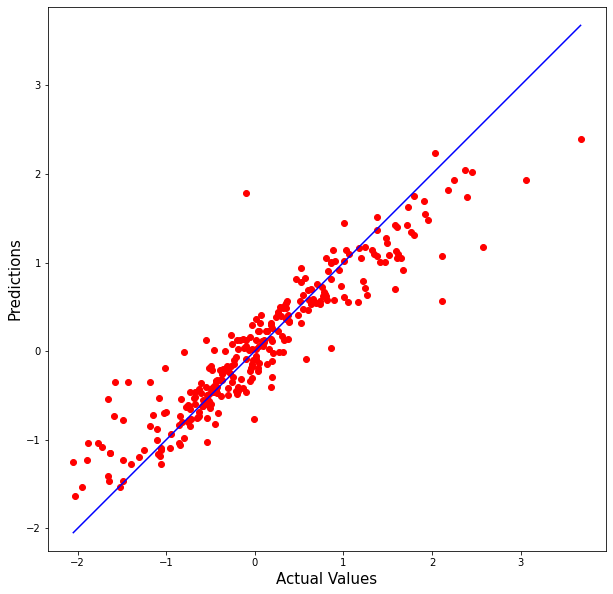

In [231]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, rfrpred, c='red')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(rfrpred), max(y_test))
p2 = min(min(rfrpred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

#### Testdata

In [233]:
x_test_best = test_df.drop(columns=['SaleType','Condition2','BsmtFinSF2']).copy()
scaled_x_test_best = scalar.fit_transform(x_test_best)

In [234]:
mod = joblib.load("Housing.pkl")
print(mod.predict(scaled_x_test_best))

[ 1.64661054e+00  3.85230014e-01  1.11815551e+00  1.35783809e-01
  7.82863919e-01 -1.52658065e+00 -3.89003903e-01  1.39586492e+00
  8.15575147e-01  4.95695640e-03 -1.91533144e+00 -3.76524562e-01
 -9.43750674e-01  3.76952033e-01  1.51845851e+00 -6.44414539e-01
 -8.01541650e-01 -7.11033059e-01  1.47466359e-01  3.62669909e-01
 -2.90918285e-01 -2.69286607e-01 -2.34040832e-01 -1.34470340e+00
 -1.58973546e+00 -5.97336095e-01  1.99638634e-01 -2.98468486e-01
 -3.12438226e-02 -1.17601732e+00 -4.08381245e-01  4.09021373e-01
  9.87225577e-01 -1.14082106e-01 -1.04597561e+00  1.32988194e-01
  3.68685912e-01 -7.78792920e-01 -1.42344554e-01 -3.58374825e-01
 -1.17816583e+00  1.48509339e+00  4.23148338e-01  3.62342534e-01
 -4.78486711e-01 -6.69235779e-01 -6.51720188e-01 -1.51200626e+00
  5.28552770e-01  1.67234785e+00 -2.31813082e-01  4.08661170e-01
 -1.22854194e+00 -1.43286425e+00  1.15776612e+00 -9.19148401e-01
 -3.10613251e-01  2.75510957e-01 -1.16388676e+00  9.98739426e-01
 -1.14601686e+00  1.45560

In [235]:
Prediction_accuracy = pd.DataFrame({'Predictions': mod.predict(scaled_x_test_best), 'Actual Values': y[0:292]})
Prediction_accuracy

Predictions  Actual Values
0       1.646611      -0.671353
1       0.385230       1.181174
2       1.118156       1.197587
3       0.135784       0.326442
4       0.782864       0.635122
5      -1.526581       0.683393
6      -0.389004      -0.804316
7       1.395865      -0.185682
8       0.815575      -0.443445
9       0.004957      -0.868211
10     -1.915331      -0.846727
11     -0.376525       0.877206
12     -0.943751       0.467193
13      0.376952      -0.701400
14      1.518459      -0.526430
15     -0.644415      -0.027928
16     -0.801542      -0.825429
17     -0.711033       0.385025
18      0.147466      -0.302571
19      0.362670      -1.153967
20     -0.290918       0.818956
21     -0.269287      -0.573786
22     -0.234041      -0.405220
23     -1.344703      -0.507743
24     -1.589735      -0.337030
25     -0.597336       0.658176
26      0.199639      -1.012648
27     -0.298468       2.126049
28     -0.031244      -0.989865
29     -1.176017       0.309248
30     -0.408381       1.615997
31      0.409021      -0.535828
32      0.987226       0.326442
33     -0.114082      -0.661418
34     -1.045976       0.032396
35      0.132988      -0.793827
36      0.368686      -0.235088
37     -0.778793       0.939162
38     -0.142345      -0.169435
39     -0.358375      -1.897994
40     -1.178166       0.635122
41      1.485093      -0.592990
42      0.423148      -0.369311
43      0.362343      -0.631856
44     -0.478487      -0.270282
45     -0.669236      -0.742048
46     -0.651720       0.176910
47     -1.512006      -0.319739
48      0.528553      -3.760790
49      1.672348      -0.185682
50     -0.231813       1.558705
51      0.408661       1.068092
52     -1.228542      -2.635067
53     -1.432864      -0.218507
54      1.157766      -1.727192
55     -0.919148       0.802818
56     -0.310613       0.190895
57      0.275511       0.326442
58     -1.163887      -1.141875
59      0.998739       0.898038
60     -1.146017      -1.117868
61      0.145560      -0.772984
62     -0.516447       0.134460
63     -0.351185       0.786570
64      0.456903      -0.889885
65     -1.150386       1.835575
66     -0.248967      -0.631856
67      0.526084      -0.631856
68     -0.467533       0.462516
69     -0.023246      -0.302571
70      1.202020       0.091247
71     -0.084631       0.748222
72      0.018624      -1.739449
73     -0.061912       0.118705
74     -0.529893      -1.914418
75      0.794750       1.433967
76      1.497662      -0.535828
77      0.363050      -1.663813
78      1.255670       2.523562
79     -0.365701       0.635122
80      0.327106       0.515172
81     -0.291322      -0.691343
82     -0.315312      -0.121339
83     -0.109379       0.047244
84      0.223822      -0.113415
85      0.667992      -1.252901
86     -0.926111      -1.070546
87      1.965440      -0.043401
88     -0.210886       0.325783
89      0.239868      -0.857445
90      0.927803      -0.145268
91     -0.536461       1.349827
92     -0.481966      -0.371986
93     -0.727310       1.341245
94      0.334207       0.076669
95     -0.061567       0.600119
96      0.851220      -0.371986
97      0.222503      -0.752316
98      1.741675      -0.268594
99     -0.656364       0.527926
100     0.976457       1.019331
101    -1.394096      -0.651525
102    -1.002128       0.731596
103    -0.096576       2.574739
104     0.395114       1.728728
105    -0.499078      -0.944926
106     1.061454       0.516390
107    -0.203703      -0.535828
108     0.349453       0.570551
109     0.346085      -0.825429
110     0.441653       0.326442
111     0.053029       0.140619
112     0.239333       0.062001
113     0.867106       1.474933
114    -0.760176       1.101637
115    -1.134984      -0.185682
116    -0.549171      -0.425382
117     0.332937       0.293266
118    -0.427696       0.047244
119    -1.012875       2.067348
120    -1.290080       1.244721
121     0.430623      -0.772984
122     0.785767      -1.105952
123    -0.389251      -1.590414
124  